In [1]:
# Import necessary libraries
from google.colab import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
uploaded = files.upload()

Saving region_10-2.csv to region_10-2.csv


In [3]:
# from google.colab import drive
# drive.mount('/content/drive')
#df = pd.read_csv('my_data.csv')

file_path = "/content/region_10-2.csv"
df = pd.read_csv(file_path, low_memory=False)
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197002280001,1970,2,28,NaN,0,NaN,102,Jordan,10,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
1,197003140002,1970,3,14,NaN,0,NaN,60,Egypt,10,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
2,197003290002,1970,3,29,NaN,0,NaN,110,Lebanon,10,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
3,197004150001,1970,4,15,NaN,0,NaN,102,Jordan,10,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
4,197004250001,1970,4,25,NaN,0,NaN,209,Turkey,10,...,NaN,NaN,NaN,NaN,PGIS,1,0,1,1,NaN


In [4]:
df.shape

(58252, 135)

#EDA

In [5]:
df.isna().sum()   #to check number of missing values present

,0
eventid,0
iyear,0
imonth,0
iday,0
approxdate,50418
...,...
INT_LOG,0
INT_IDEO,0
INT_MISC,0
INT_ANY,0


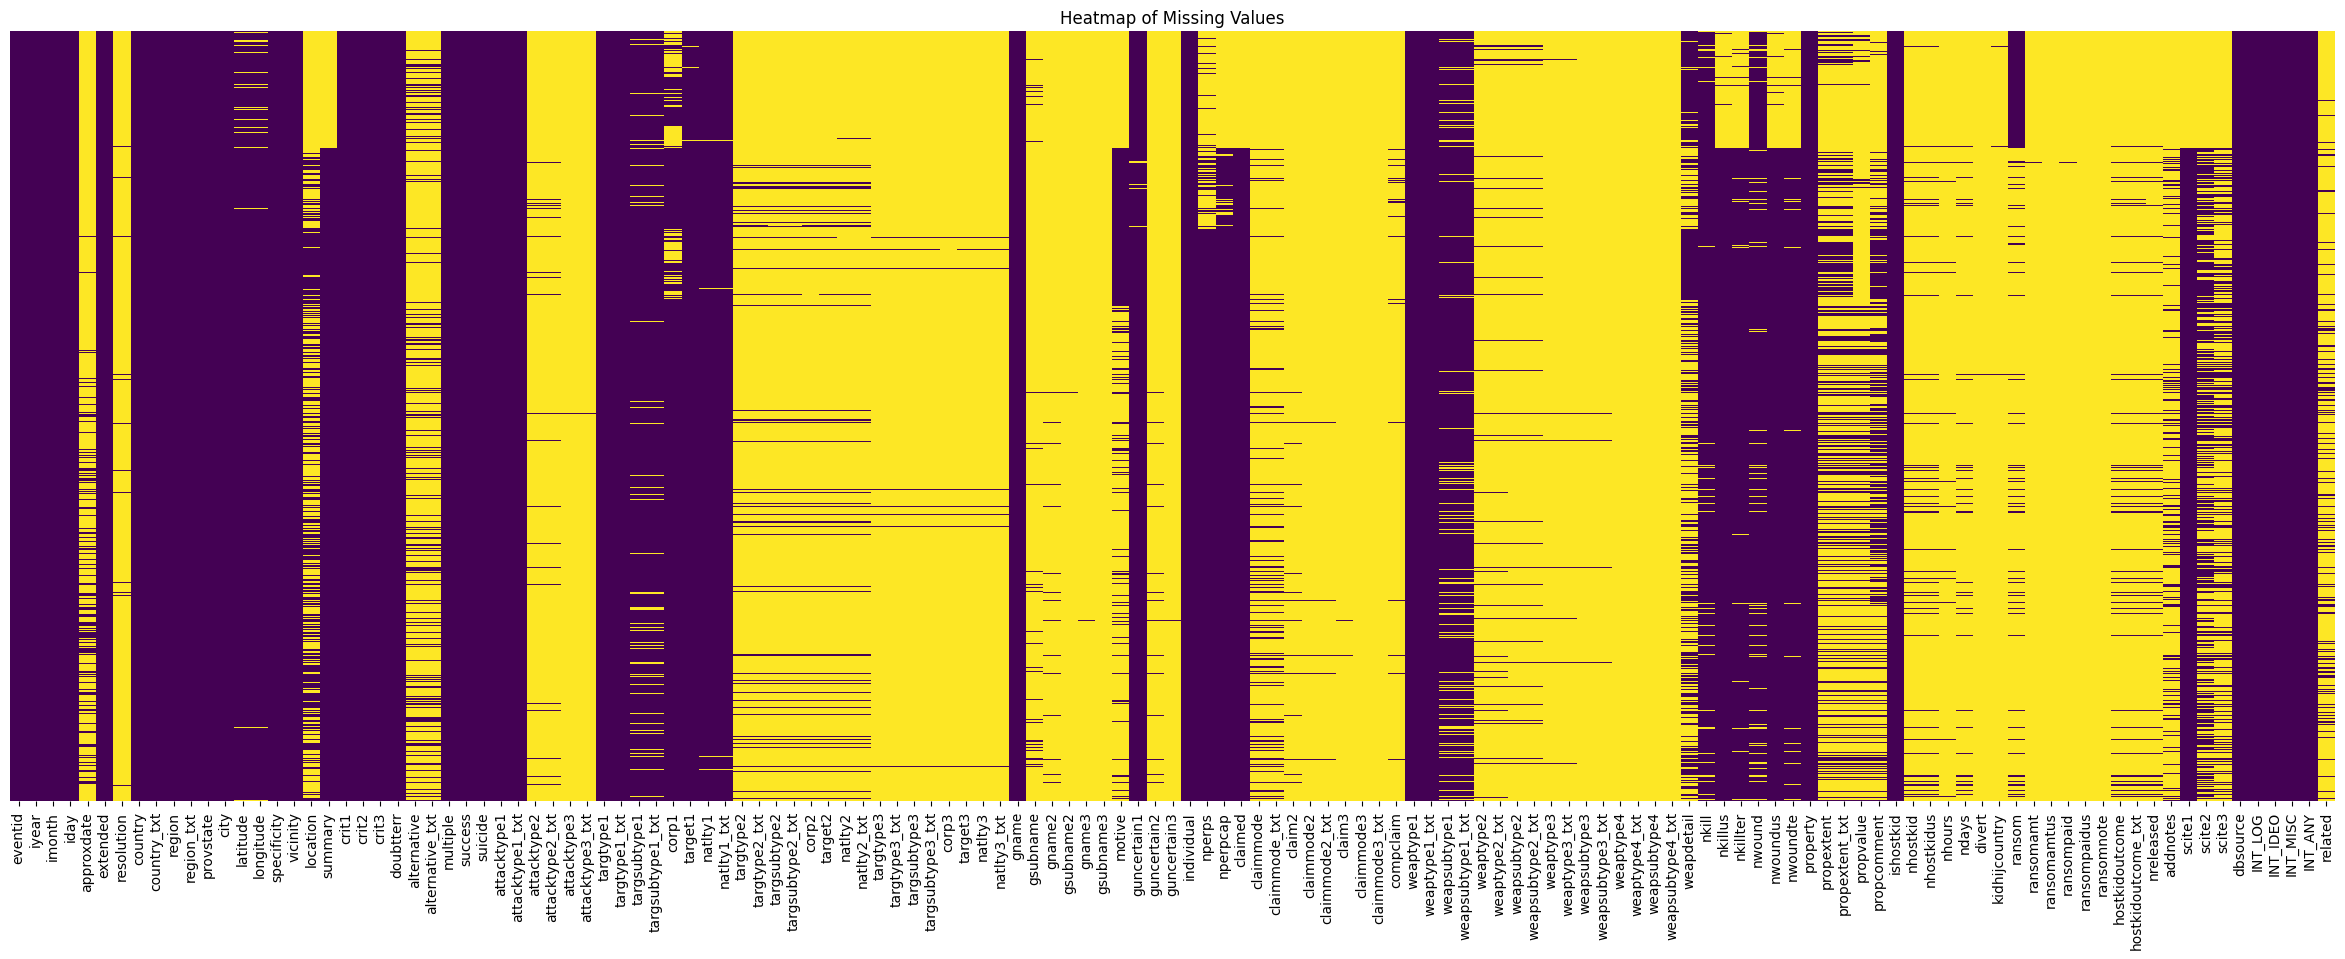

In [6]:
# Plot heatmap of null values
plt.figure(figsize=(30, 10))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

In [7]:
total_missing_percentage = df.isnull().sum().sum() * 100 / df.size
print(f"Total missing data: {total_missing_percentage:.2f}%")

Total missing data: 54.86%


####Drop Columns (if most values are missing)
If a column has more than a certain threshold (e.g., 70% missing), consider dropping it:


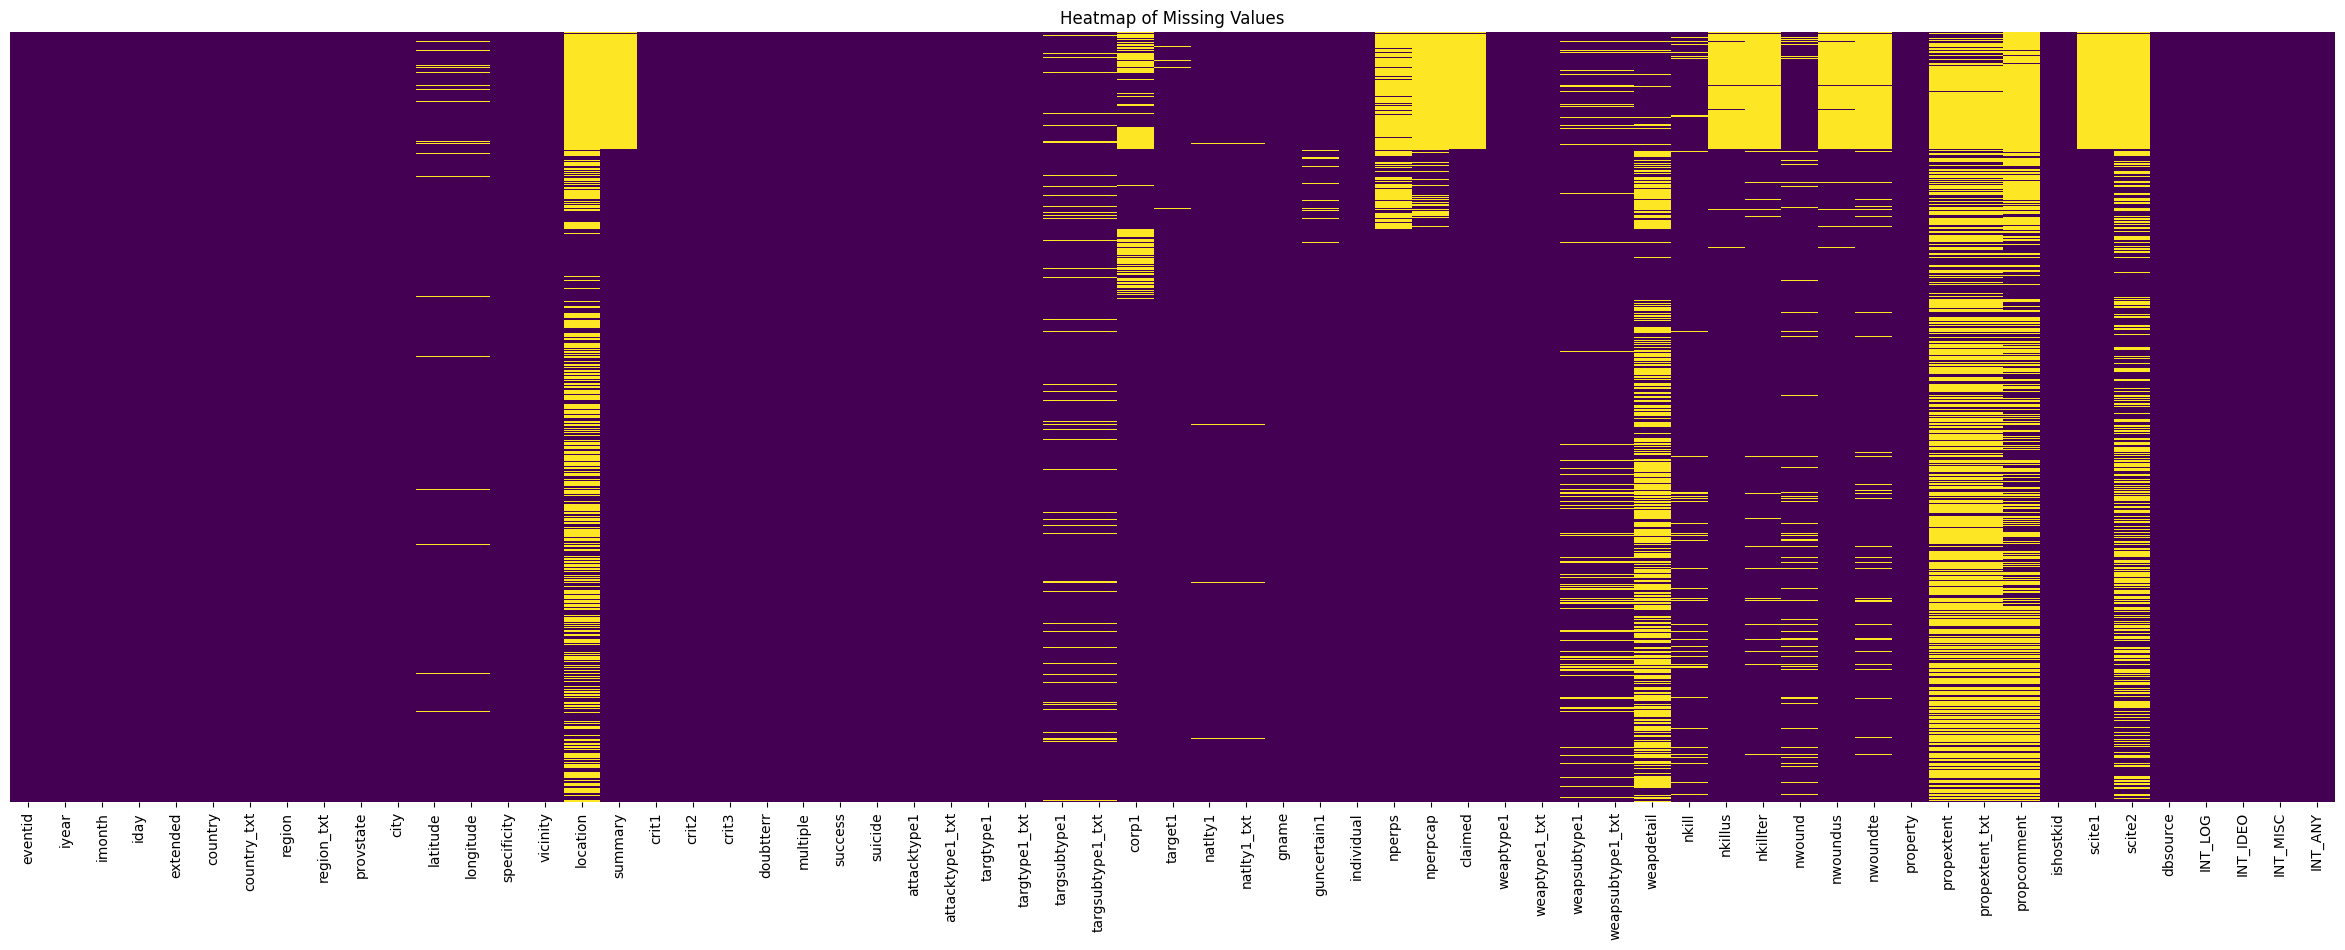

(58252, 63)
Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1',
       'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1',
       'natlty1_txt', 'gname', 'guncertain1', 'individual', 'nperps',
       'nperpcap', 'claimed', 'weaptype1', 'weaptype1_txt', 'weapsubtype1',
       'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propcomment', 'ishostkid', 'scite1', 'scite2',
       'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY'],
      dtype='object')


In [8]:
threshold = 70  # Set your threshold
df_clr = df.dropna(axis=1, thresh=len(df) * (1 - threshold / 100))

# Plot heatmap of null values
plt.figure(figsize=(30, 10))
sns.heatmap(df_clr.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

print(df_clr.shape)
print(df_clr.columns)

In [9]:
df_clr.shape

(58252, 63)

####Imputation (for numeric columns)

In [10]:
dff = df_clr.copy()

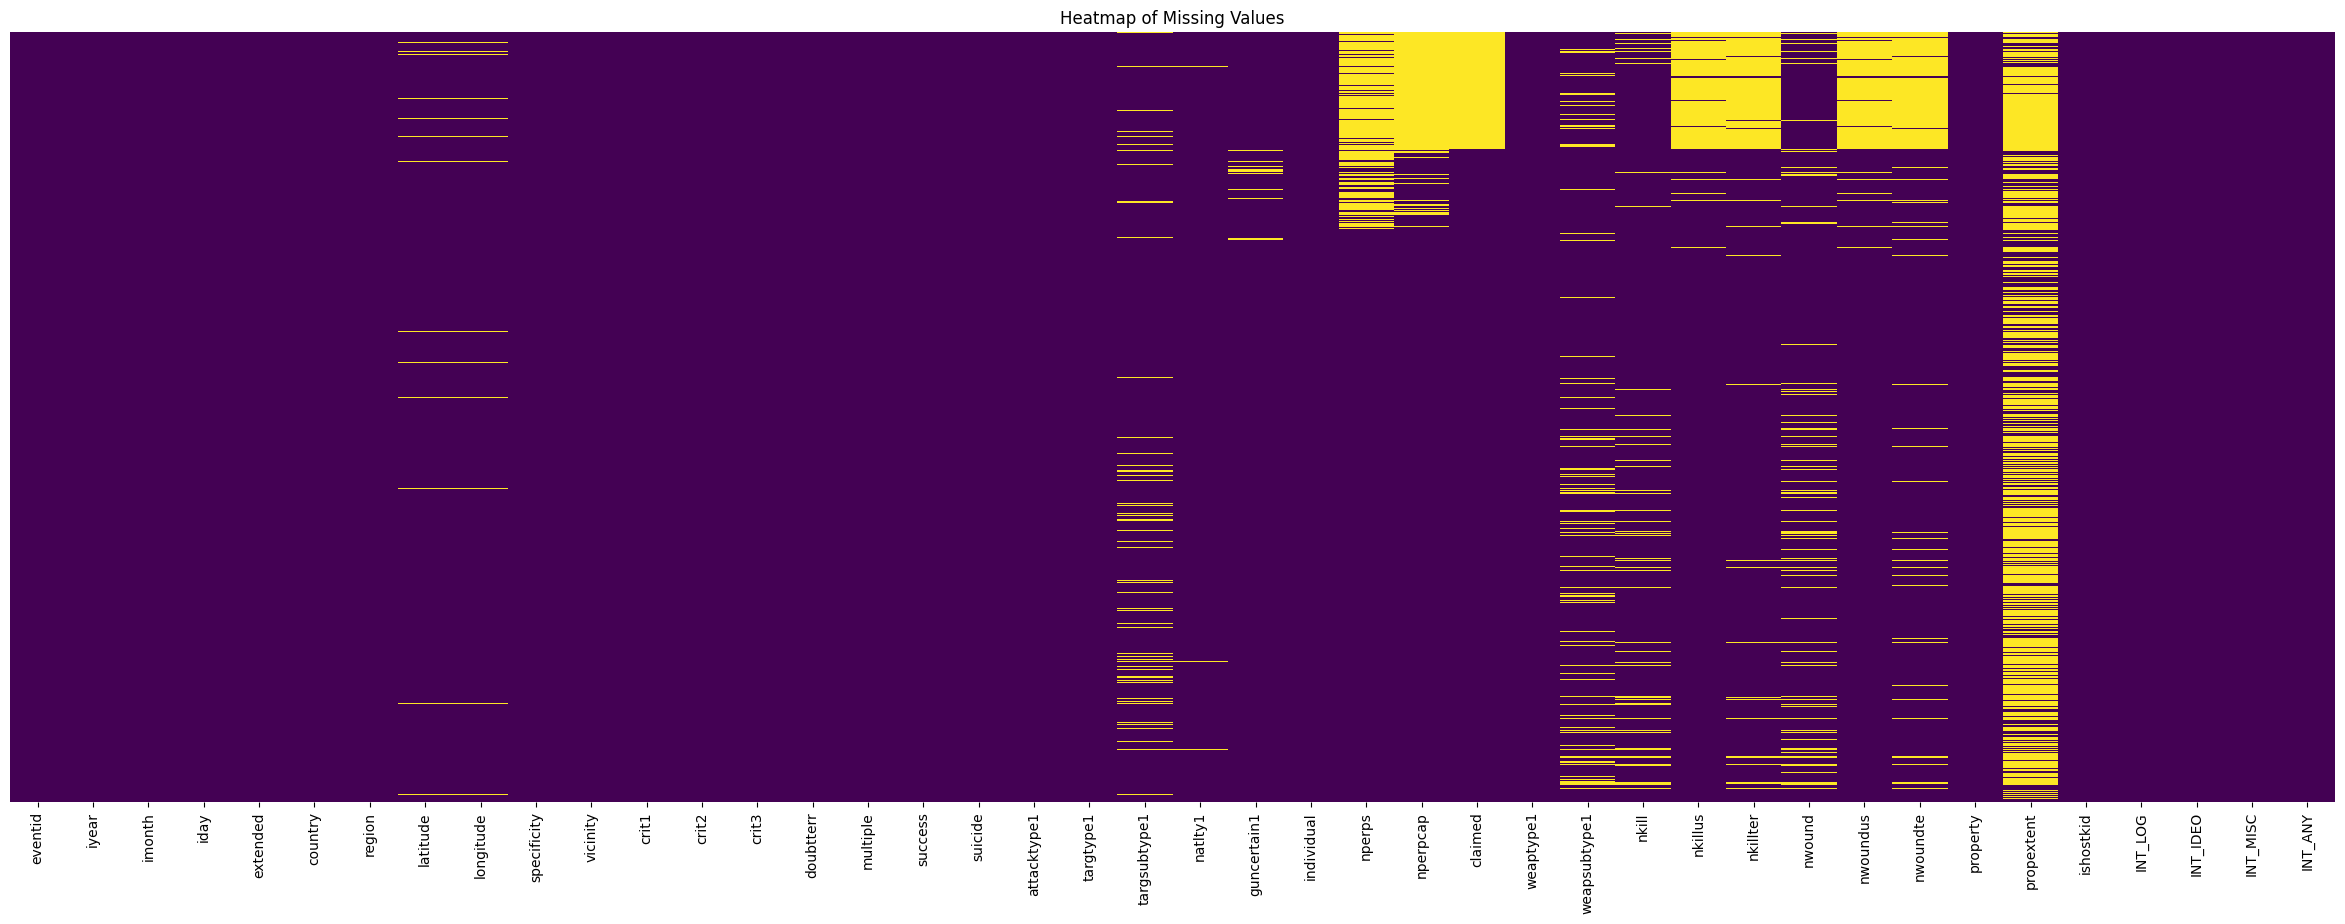

In [11]:
int_columns = dff.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(30, 10))
sns.heatmap(dff[int_columns.columns].isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()



In [12]:
int_columns

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,nwound,nwoundus,nwoundte,property,propextent,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197002280001,1970,2,28,0,102,10,31.530243,35.094162,1.0,...,NaN,NaN,NaN,1,4.0,0.0,-9,-9,0,-9
1,197003140002,1970,3,14,0,60,10,31.198056,29.919167,1.0,...,2.0,NaN,NaN,1,4.0,0.0,-9,-9,0,-9
2,197003290002,1970,3,29,0,110,10,33.888523,35.503513,1.0,...,0.0,NaN,NaN,1,NaN,0.0,0,1,1,1
3,197004150001,1970,4,15,0,102,10,31.950001,35.933331,1.0,...,0.0,NaN,NaN,1,3.0,0.0,0,1,1,1
4,197004250001,1970,4,25,0,209,10,41.106178,28.689863,1.0,...,0.0,NaN,NaN,1,NaN,0.0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58247,202012310007,2020,12,31,0,95,10,33.078350,44.254721,1.0,...,0.0,0.0,0.0,1,4.0,0.0,-9,-9,1,1
58248,202012310009,2020,12,31,0,95,10,NaN,NaN,5.0,...,0.0,0.0,0.0,0,NaN,0.0,-9,-9,0,-9
58249,202012310013,2020,12,31,0,228,10,12.849085,45.037275,1.0,...,0.0,0.0,0.0,1,3.0,0.0,-9,-9,1,1
58250,202012310015,2020,12,31,0,228,10,15.305307,43.019490,2.0,...,NaN,0.0,0.0,1,3.0,0.0,0,0,0,0


We have some negative values along with missing values which needed to be treated.

In [13]:
# if any column has negative entries we will turn it to 0
for col in dff.columns:
    if dff[col].dtype in ['int64', 'float64']:
        if (dff[col] < 0).any():
            dff[col] = dff[col].clip(lower=0)

int_columns = dff.select_dtypes(include=['int64', 'float64'])
int_columns

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,nwound,nwoundus,nwoundte,property,propextent,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197002280001,1970,2,28,0,102,10,31.530243,35.094162,1.0,...,NaN,NaN,NaN,1,4.0,0.0,0,0,0,0
1,197003140002,1970,3,14,0,60,10,31.198056,29.919167,1.0,...,2.0,NaN,NaN,1,4.0,0.0,0,0,0,0
2,197003290002,1970,3,29,0,110,10,33.888523,35.503513,1.0,...,0.0,NaN,NaN,1,NaN,0.0,0,1,1,1
3,197004150001,1970,4,15,0,102,10,31.950001,35.933331,1.0,...,0.0,NaN,NaN,1,3.0,0.0,0,1,1,1
4,197004250001,1970,4,25,0,209,10,41.106178,28.689863,1.0,...,0.0,NaN,NaN,1,NaN,0.0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58247,202012310007,2020,12,31,0,95,10,33.078350,44.254721,1.0,...,0.0,0.0,0.0,1,4.0,0.0,0,0,1,1
58248,202012310009,2020,12,31,0,95,10,NaN,NaN,5.0,...,0.0,0.0,0.0,0,NaN,0.0,0,0,0,0
58249,202012310013,2020,12,31,0,228,10,12.849085,45.037275,1.0,...,0.0,0.0,0.0,1,3.0,0.0,0,0,1,1
58250,202012310015,2020,12,31,0,228,10,15.305307,43.019490,2.0,...,NaN,0.0,0.0,1,3.0,0.0,0,0,0,0


We will impute few numerical values with median (as we have outliers present) and few imputations will be based on the their relationship with equivalent categorical columns (if present).

Example: If attack_type1 is 2 that means Armed Assault

In [14]:
int_columns.isnull().sum()

,0
eventid,0
iyear,0
imonth,0
iday,0
extended,0
country,0
region,0
latitude,974
longitude,974
specificity,0


In [15]:
# Impute 'longitude' and 'latitude' with their respective medians
dff['longitude'] = dff['longitude'].fillna(dff['longitude'].median())
dff['latitude'] = dff['latitude'].fillna(dff['latitude'].median())
dff['nkill'] = dff['nkill'].fillna(dff['nkill'].median())
dff['nwound'] = dff['nwound'].fillna(dff['nwound'].median())
dff['nkillter'] = dff['nkillter'].fillna(dff['nkillter'].median())
dff['nkillus'] = dff['nkillus'].fillna(dff['nkillus'].median())
dff['nwoundte'] = dff['nwoundte'].fillna(dff['nwoundte'].median())
dff['nwoundus'] = dff['nwoundus'].fillna(dff['nwoundus'].median())
dff['claimed'] = dff['claimed'].fillna(dff['claimed'].median())
dff['nperps'] = dff['nperps'].fillna(dff['nperps'].median())
dff['nperpcap'] = dff['nperpcap'].fillna(dff['nperpcap'].median())
dff['guncertain1'] = dff['guncertain1'].fillna(dff['guncertain1'].median())


# Impute propextent w.r.t propextent_txt
dff['propextent'] = dff['propextent'].fillna(4)      # 4 here is for Unknown

dff['weapsubtype1'] = dff['weapsubtype1'].fillna(0)  # 0 here is for Unknown
dff['targsubtype1'] = dff['targsubtype1'].fillna(0)  # 0 here is for Unknown
dff['natlty1'] = dff['natlty1'].fillna(0)            # 0 here is for Unknown

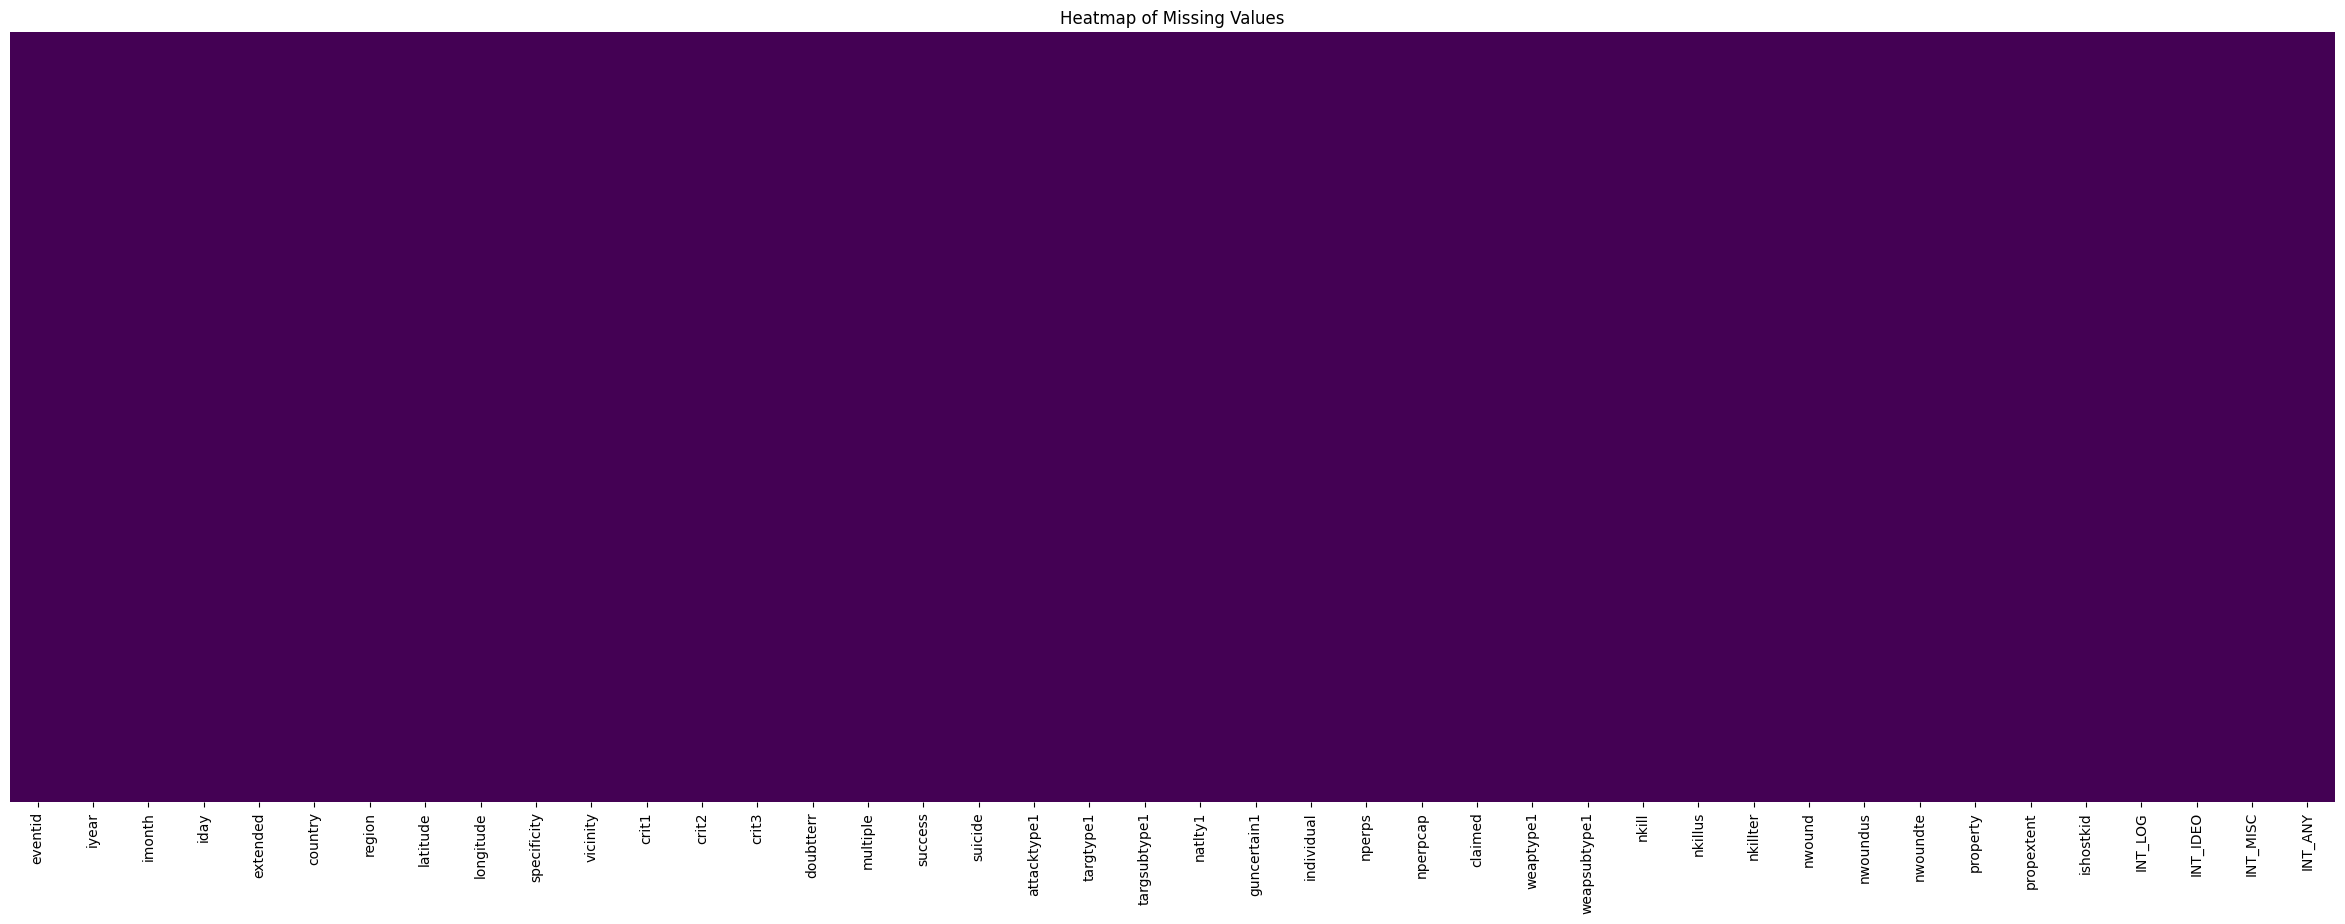

In [16]:
plt.figure(figsize=(30, 10))
sns.heatmap(dff[int_columns.columns].isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()


####For categorical columns

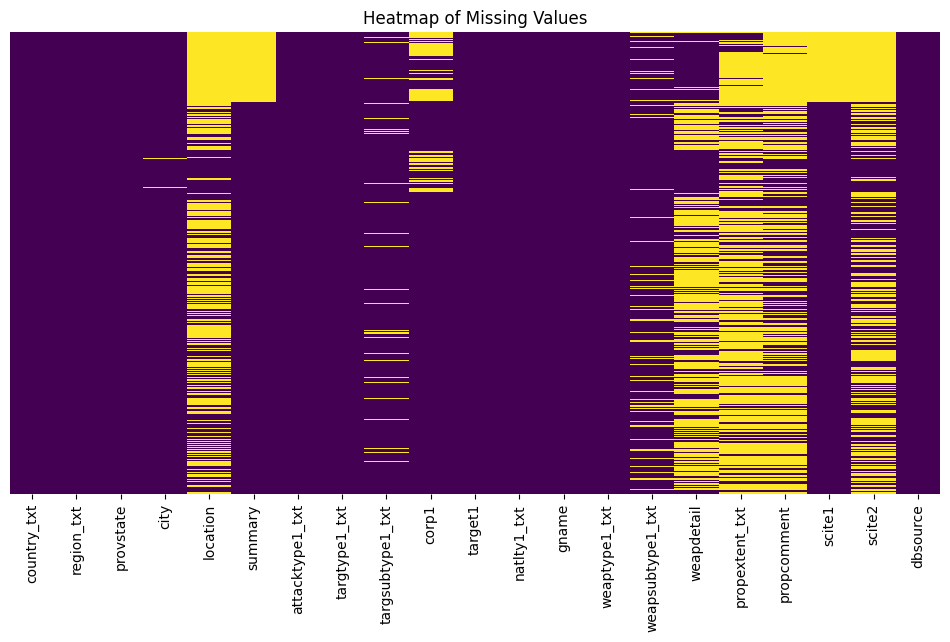

In [17]:
df_catcols =  dff.select_dtypes(exclude=['int64', 'float64'])

# Display non-numeric columns
plt.figure(figsize=(12, 6))
sns.heatmap(dff[df_catcols.columns].isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

In [18]:
# Fill missing categorical values with the most frequent category (mode)
dff['city'] = dff['city'].fillna(dff['city'].mode()[0])
dff['targsubtype1_txt'] = dff['targsubtype1_txt'].fillna(dff['targsubtype1_txt'].mode()[0])
dff['summary'] = dff['summary'].fillna(dff['summary'].mode()[0])
dff['corp1'] = dff['corp1'].fillna(dff['corp1'].mode()[0])
dff['natlty1_txt'] = dff['natlty1_txt'].fillna(dff['natlty1_txt'].mode()[0])
dff['weapsubtype1_txt'] = dff['weapsubtype1_txt'].fillna(dff['weapsubtype1_txt'].mode()[0])
dff['scite1'] = dff['scite1'].fillna(dff['scite1'].mode()[0])
dff['target1'] = dff['target1'].fillna(dff['target1'].mode()[0])

dff[['location','propextent_txt', 'propcomment','weapdetail', 'scite2']] = dff[['location','propextent_txt', 'propcomment','weapdetail', 'scite2']].fillna('Unknown')

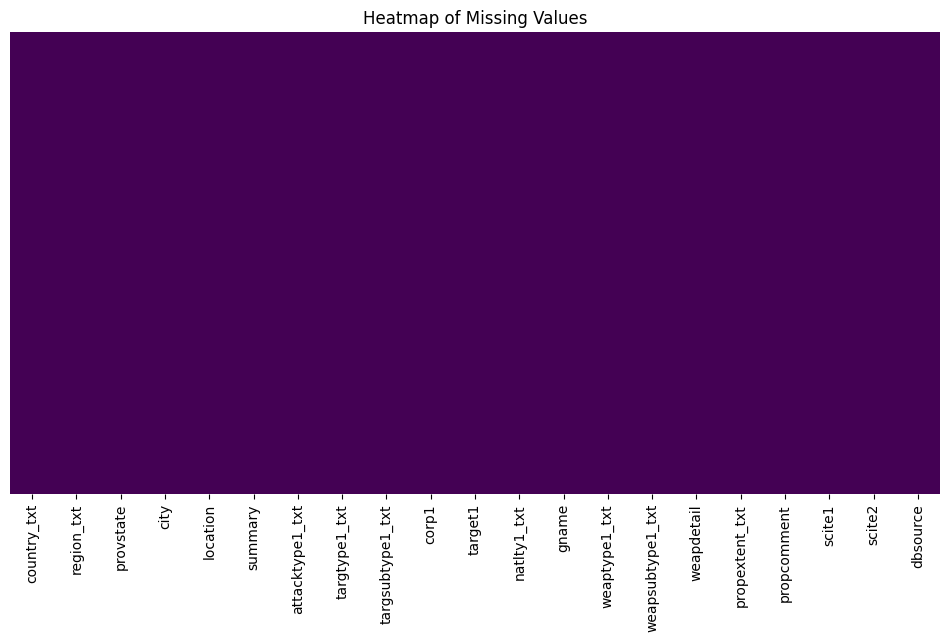

In [19]:
plt.figure(figsize=(12, 6))
sns.heatmap(dff[df_catcols.columns].isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title("Heatmap of Missing Values")
plt.show()

#### Treating Outliers

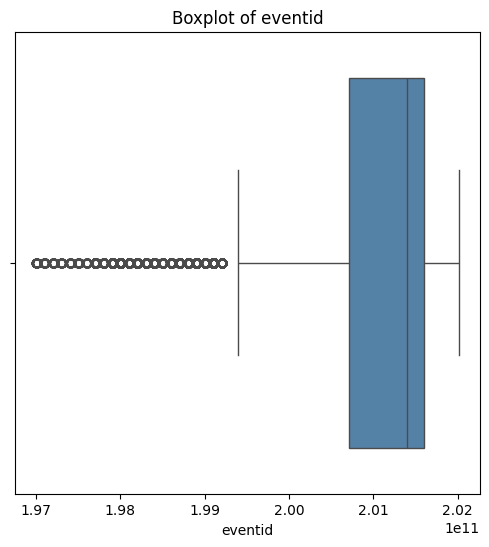

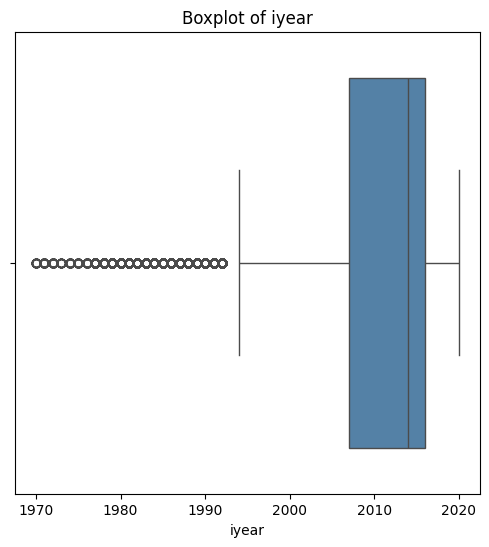

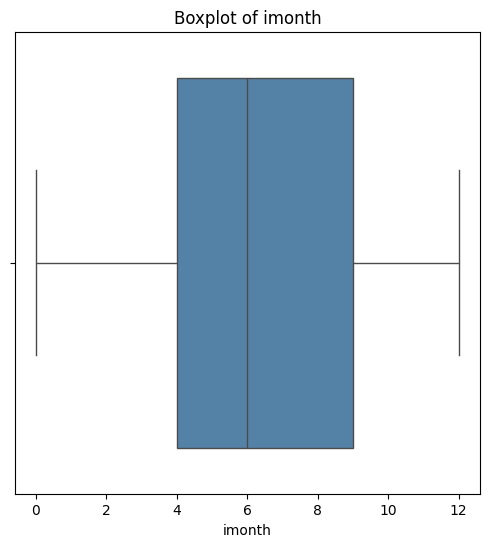

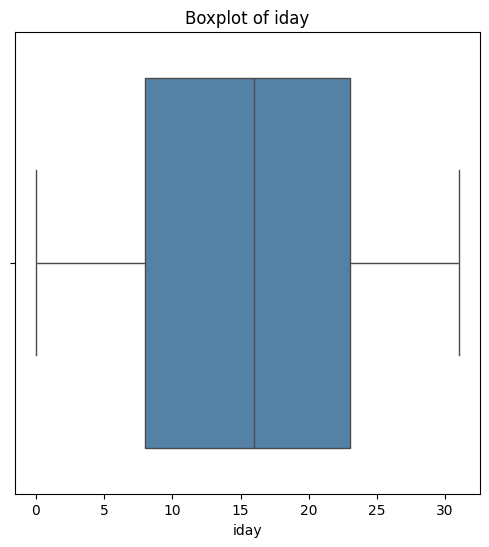

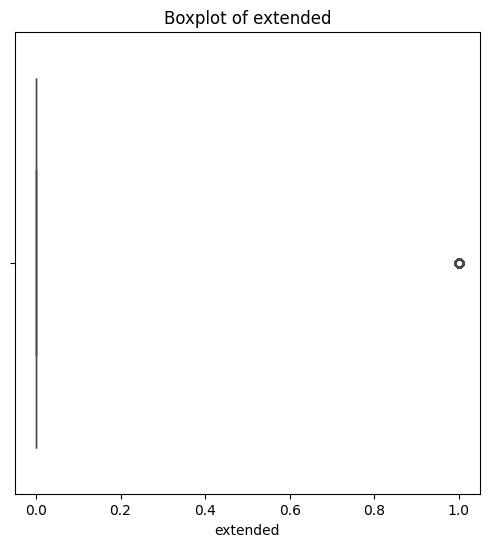

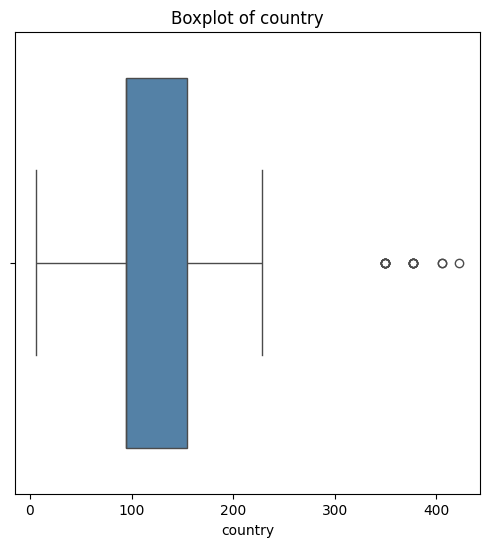

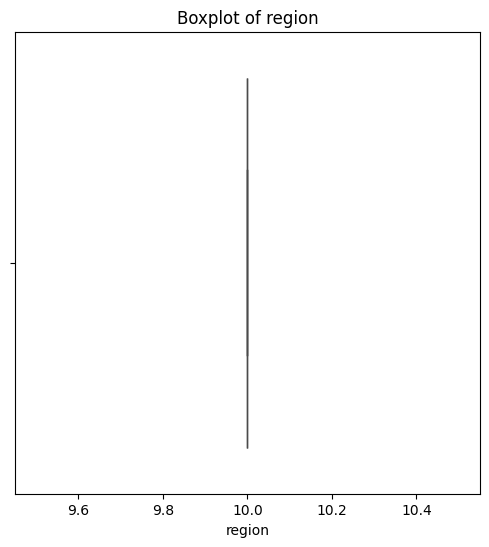

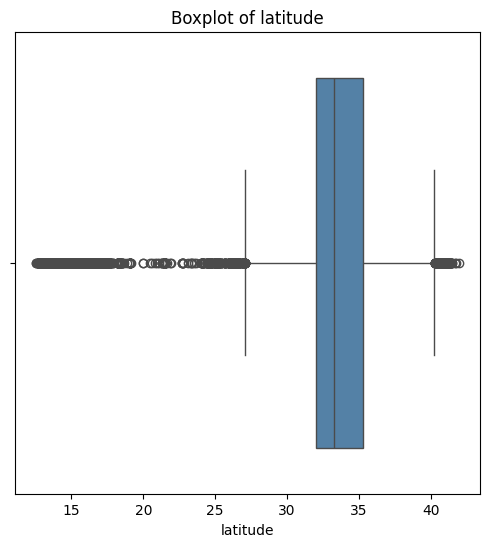

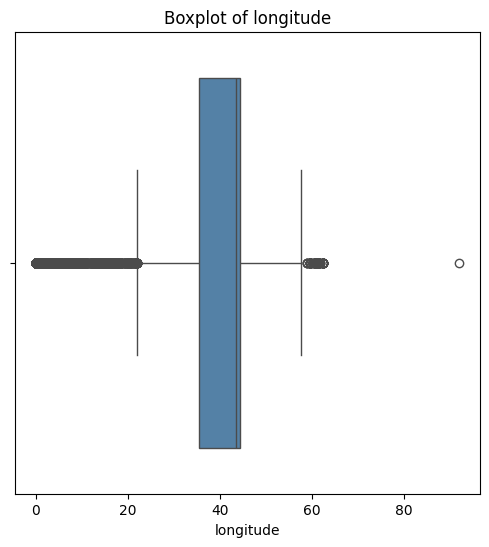

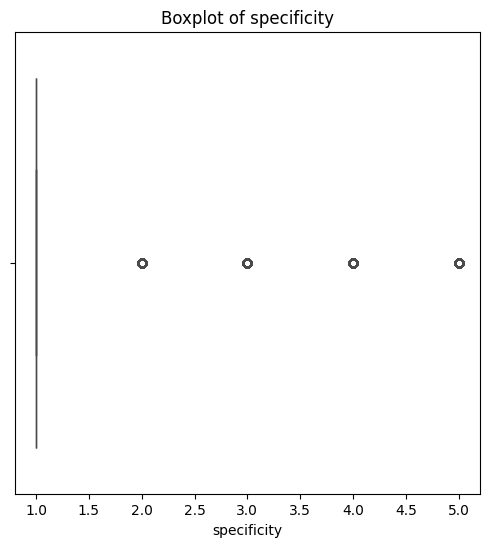

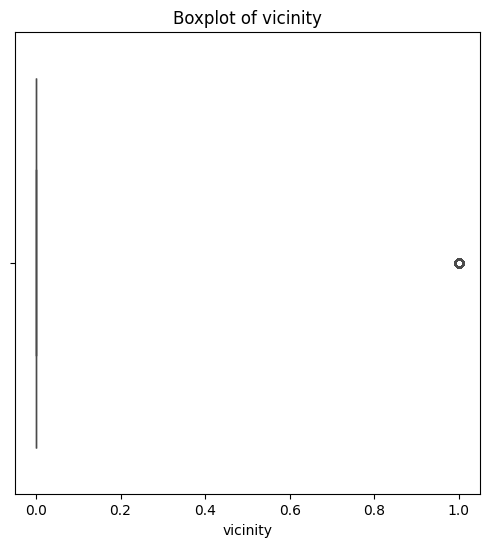

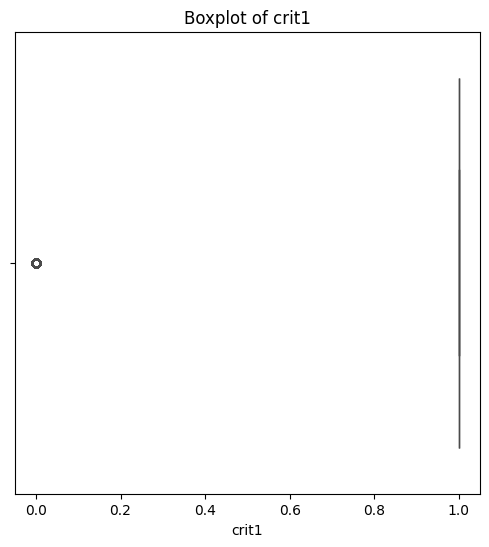

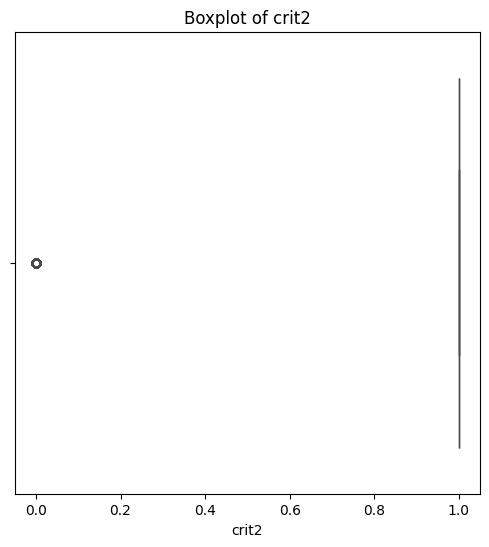

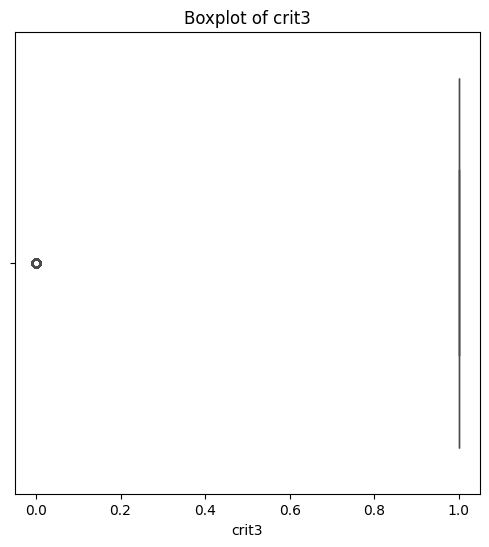

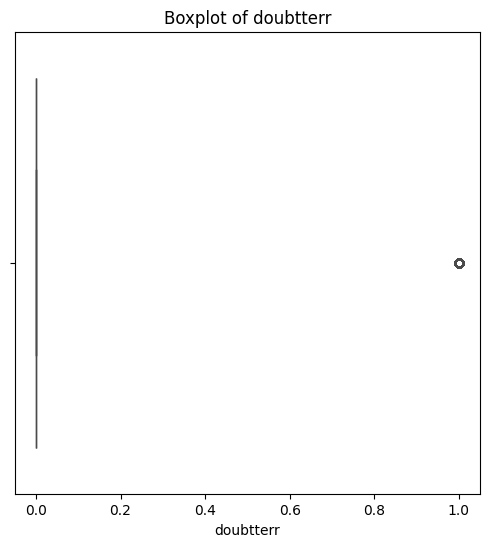

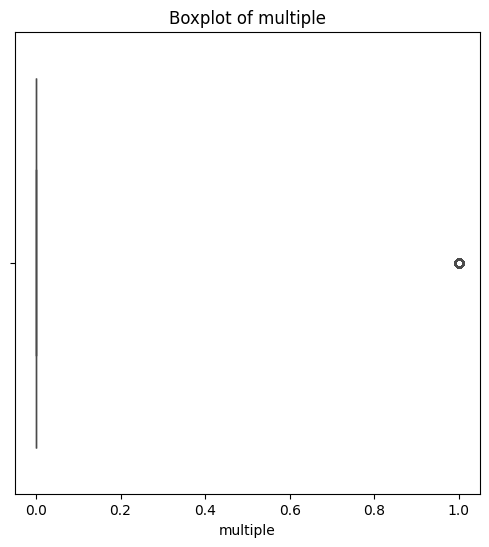

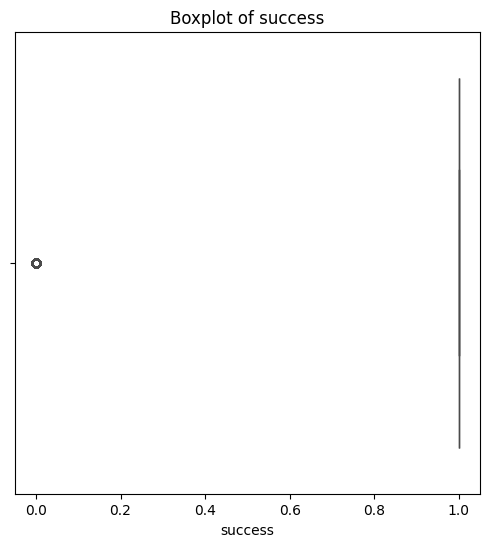

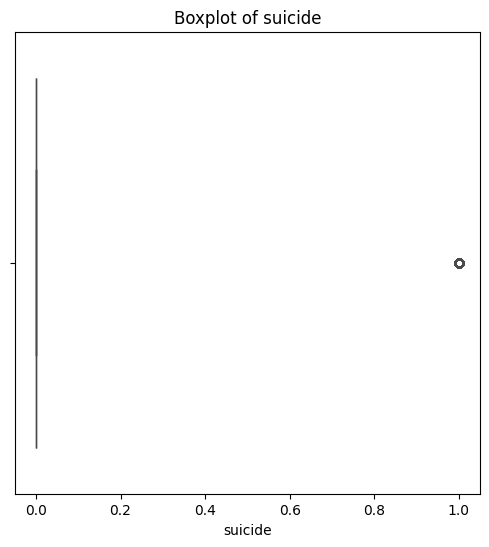

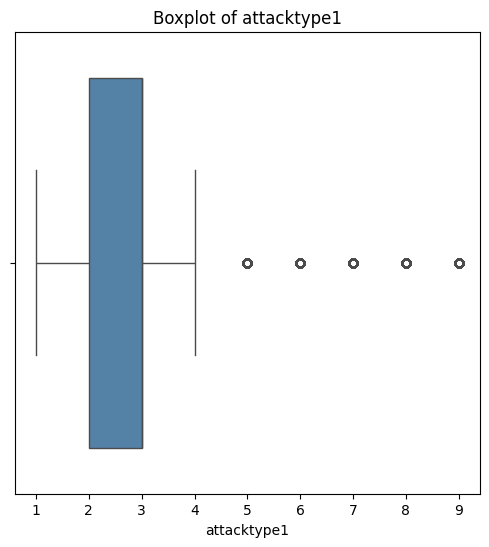

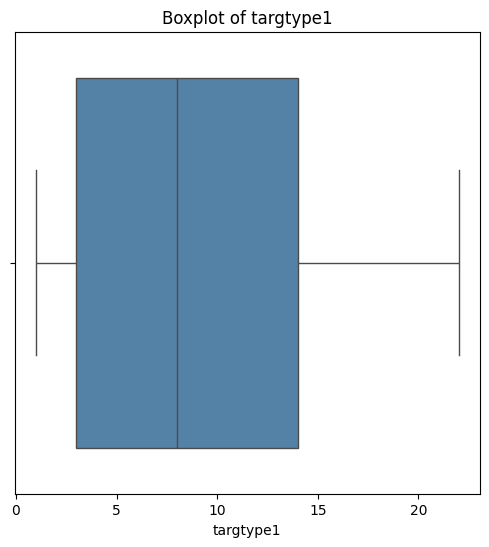

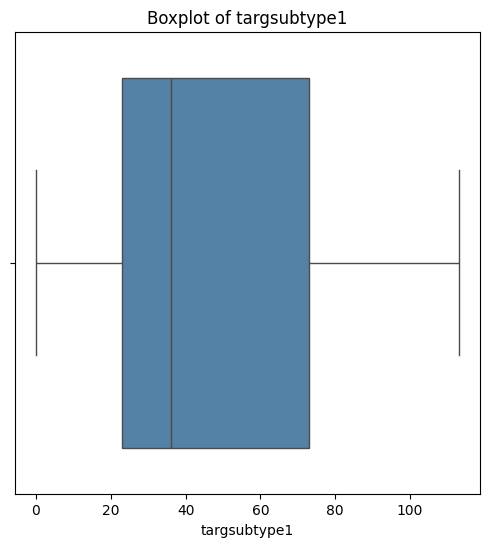

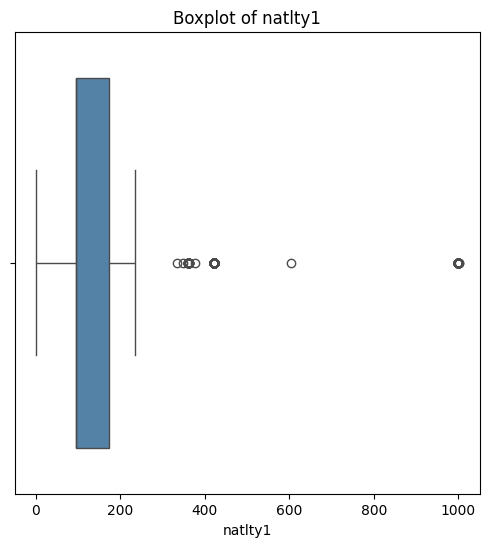

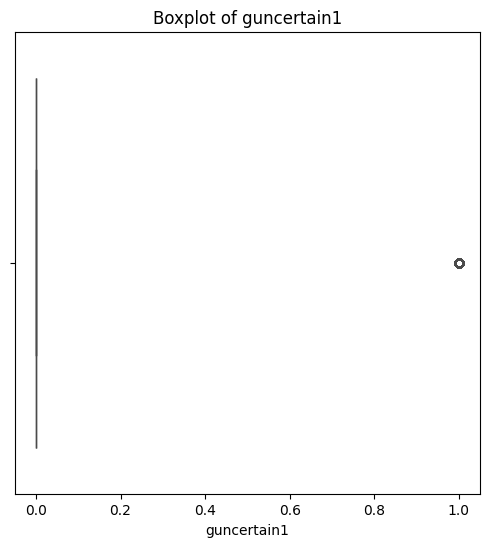

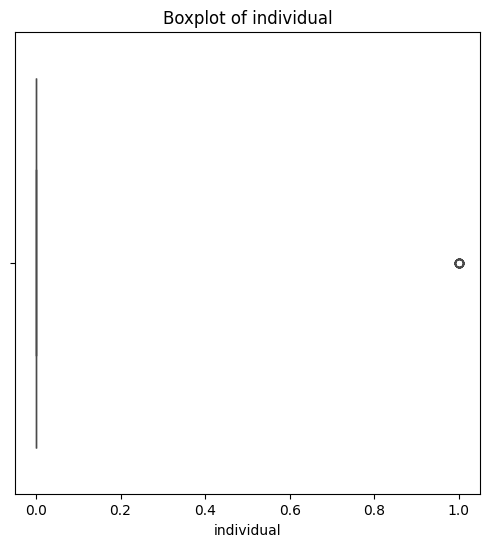

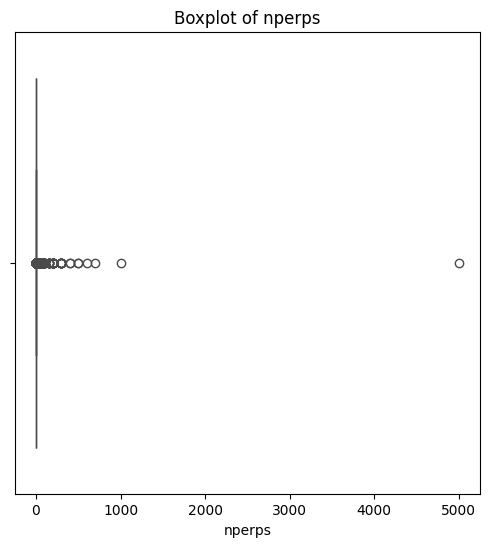

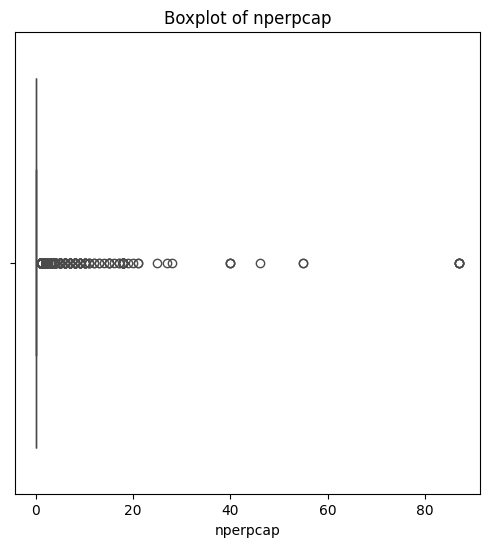

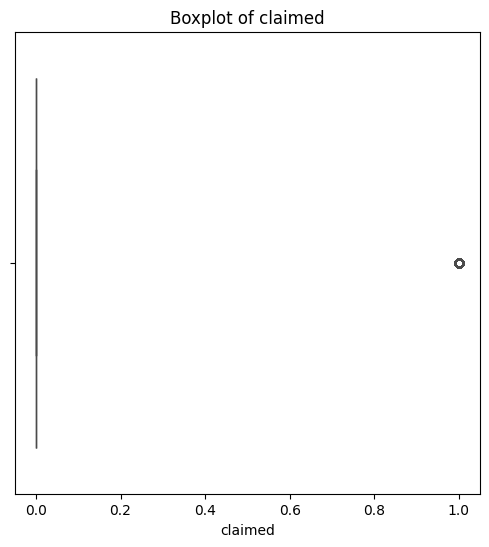

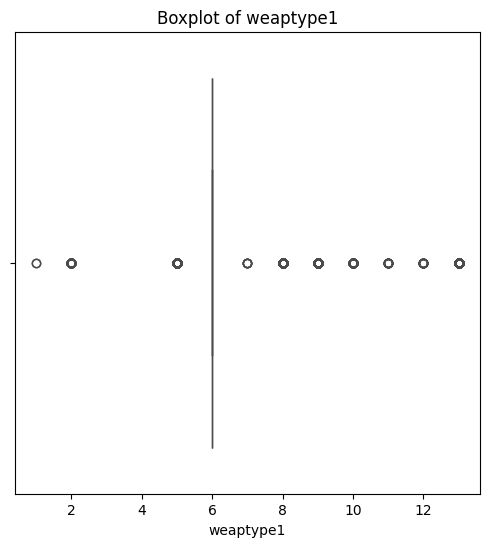

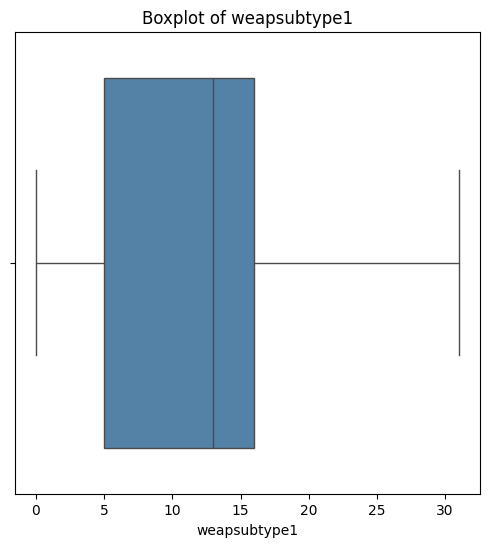

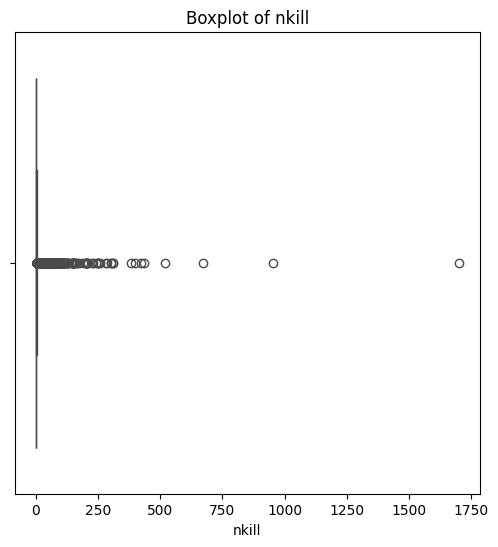

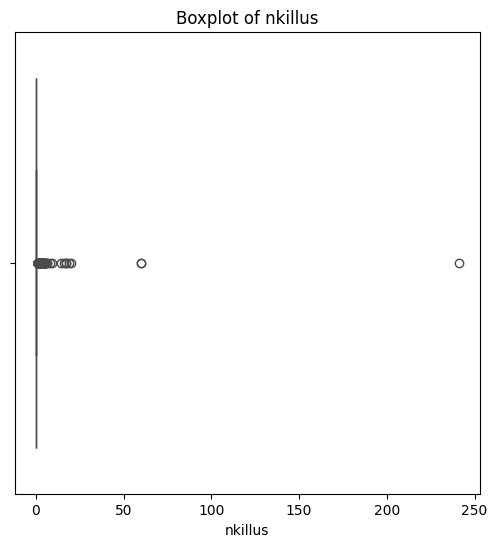

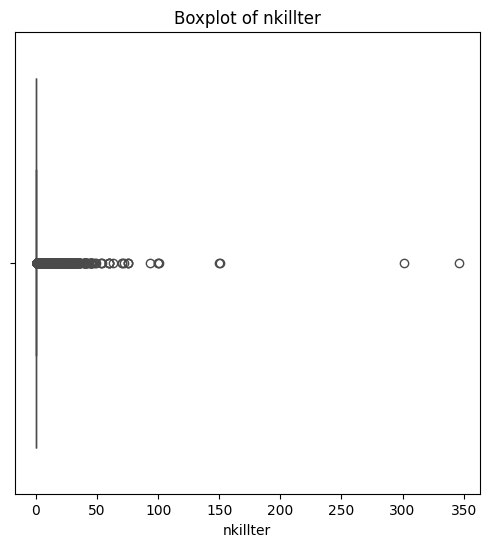

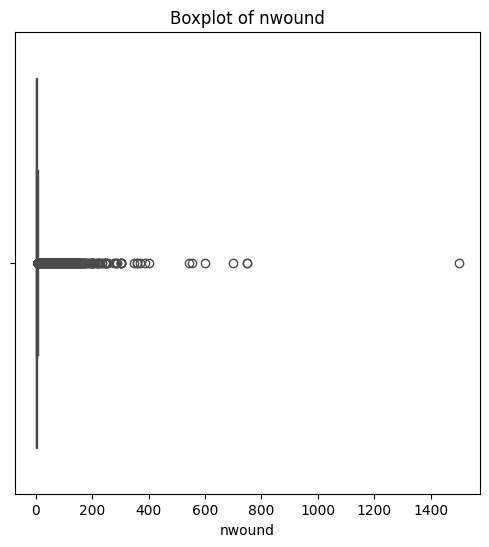

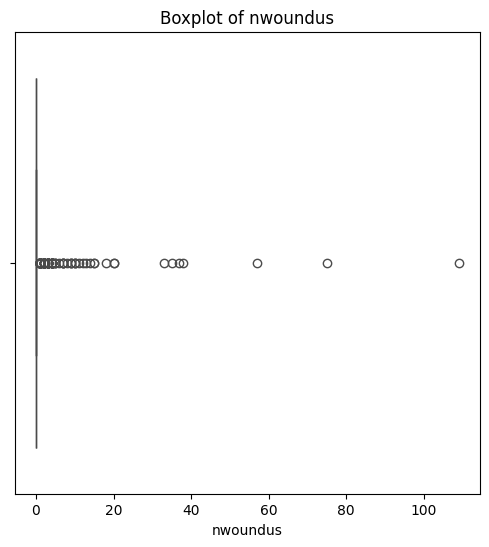

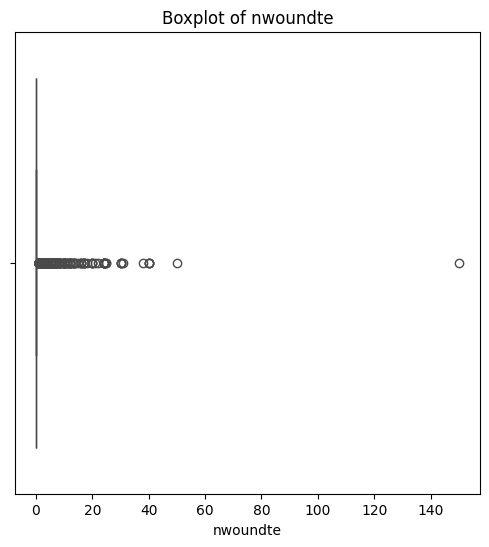

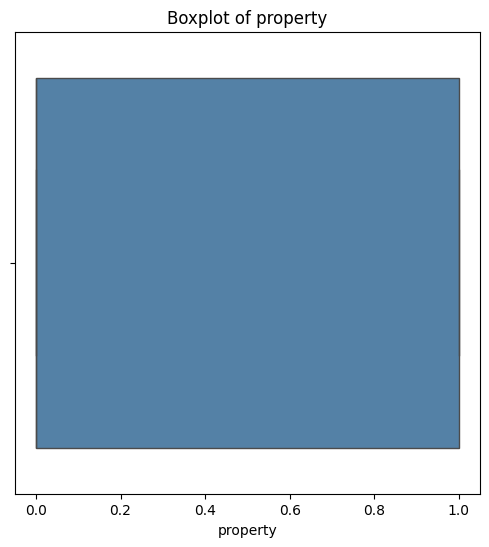

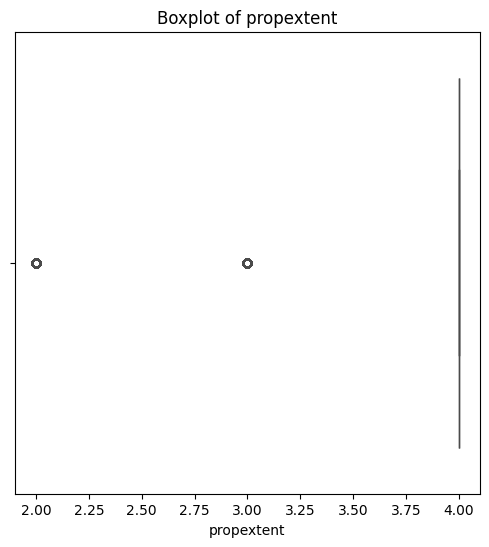

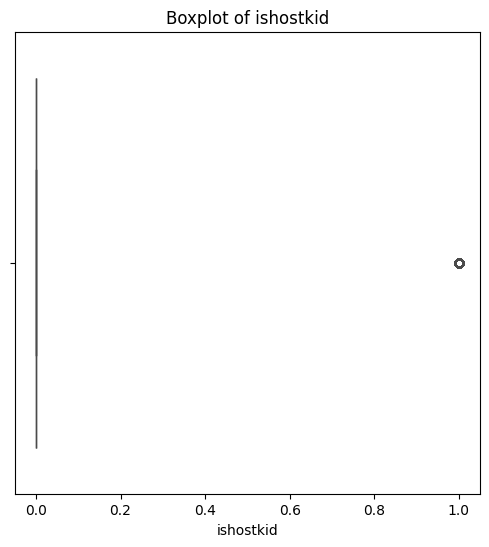

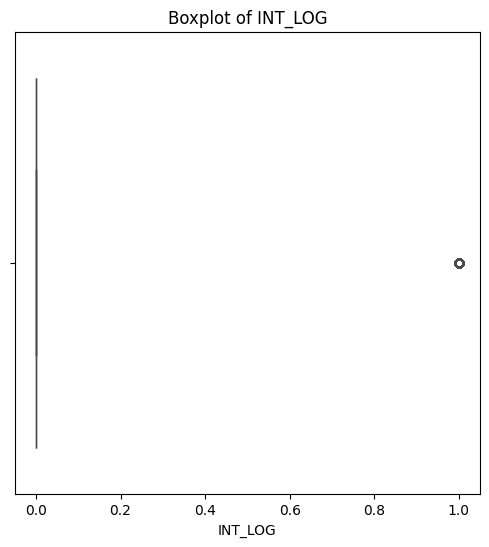

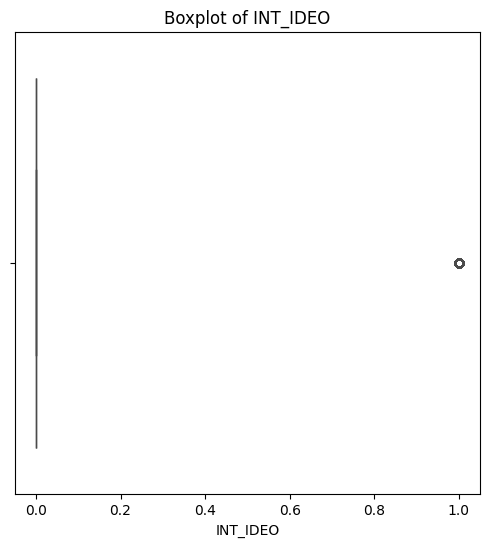

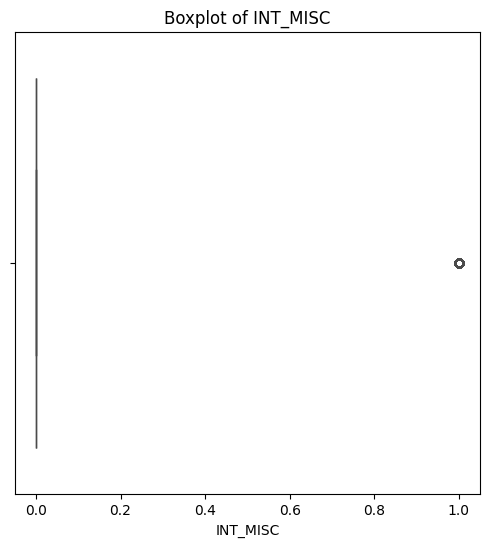

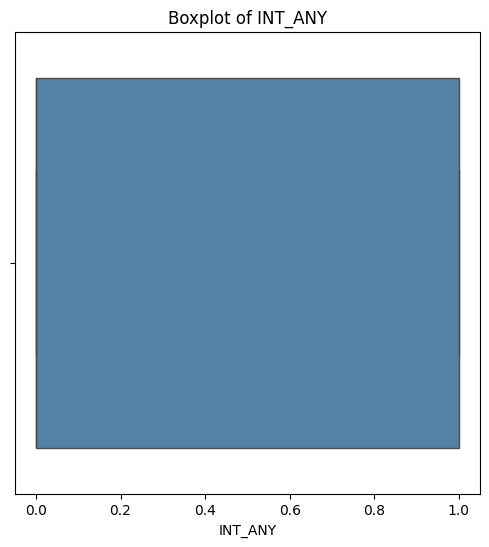

In [20]:
# Function to find outliers using IQR
def find_outliers(dff):
    outliers = {}
    for column in dff.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = dff[column].quantile(0.25)
        Q3 = dff[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Find the outliers
        outliers[column] = dff[(dff[column] < lower_bound) | (dff[column] > upper_bound)][column]

    return outliers


outliers = find_outliers(dff)
for column in dff.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6, 6))

    ax = sns.boxplot(data=dff, x=column, color="steelblue")
    for box in ax.artists:
        box.set_edgecolor("black")  # Adding edge color for the box
        box.set_linewidth(1.5)      # Setting the line width for the box

    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

In [21]:
#for partial capping as our outliers are part of data and not noise
def partial_cap_outliers(dff):
    df_capped = dff.copy()

    for column in df_capped.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df_capped[column].quantile(0.25)
        Q3 = df_capped[column].quantile(0.75)
        IQR = Q3 - Q1

        # Use a more flexible capping range (2x IQR instead of 1.5x)
        lower_bound = Q1 - 2 * IQR
        upper_bound = Q3 + 2 * IQR

        # Compute 1st and 99th percentiles as an alternative capping strategy
        p1 = df_capped[column].quantile(0.01)
        p99 = df_capped[column].quantile(0.99)

        # Use the more conservative approach (whichever is less extreme)
        final_lower_bound = max(lower_bound, p1)
        final_upper_bound = min(upper_bound, p99)

        # Apply capping only to extreme outliers
        df_capped[column] = df_capped[column].apply(lambda x: final_lower_bound if x < final_lower_bound else
                                                               (final_upper_bound if x > final_upper_bound else x))

    return df_capped


df_capped = partial_cap_outliers(dff)
# Drop duplicates after capping (in case any remain)
df_capped = df_capped.drop_duplicates().reset_index(drop=True)

# Print before and after shape
print(f"Original dataset shape: {dff.shape}")
print(f"After partial capping and duplicate removal: {df_capped.shape}")


Original dataset shape: (58252, 63)
After partial capping and duplicate removal: (58112, 63)


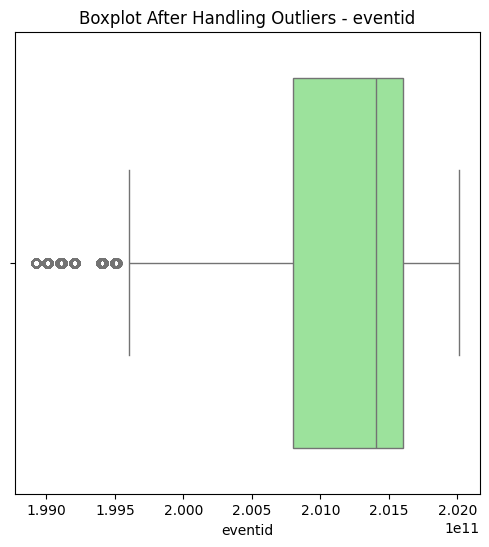

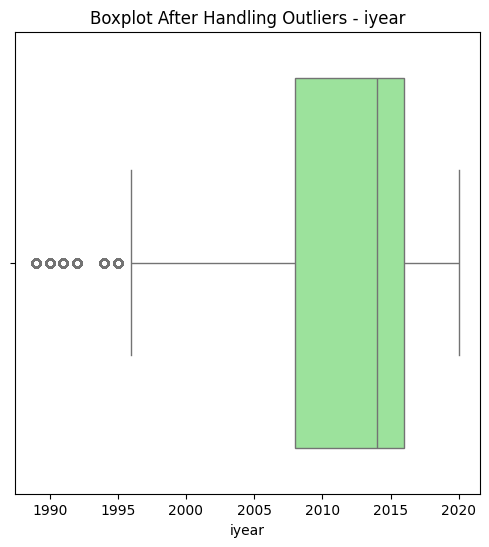

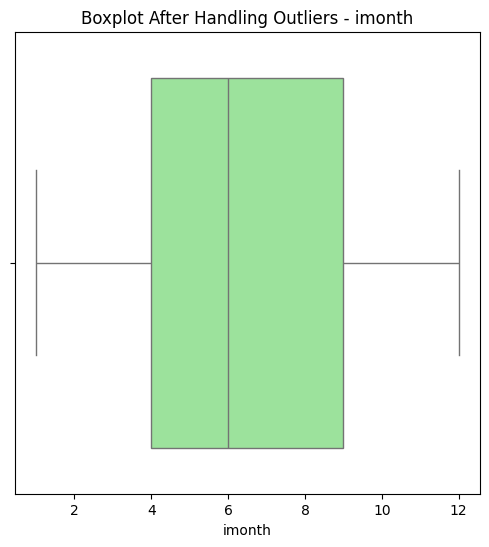

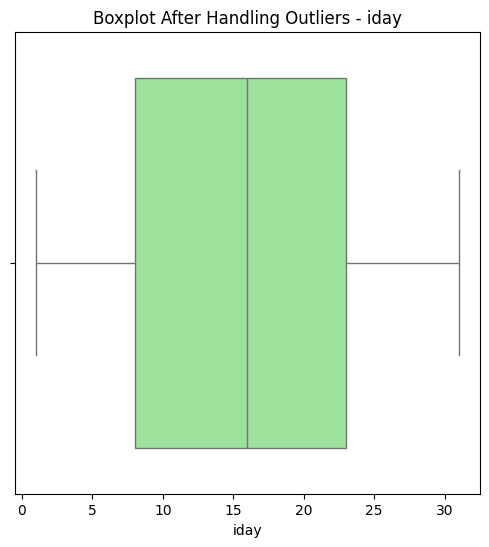

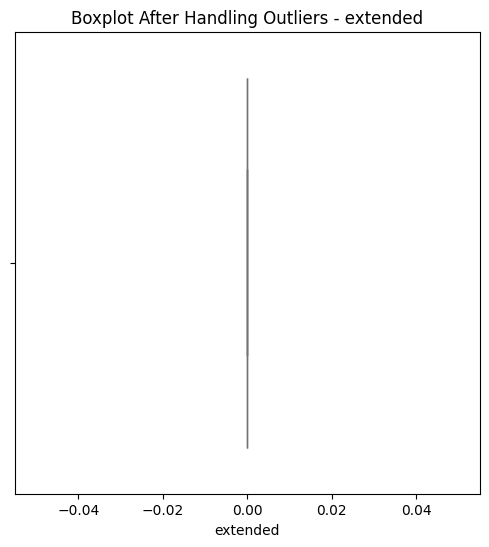

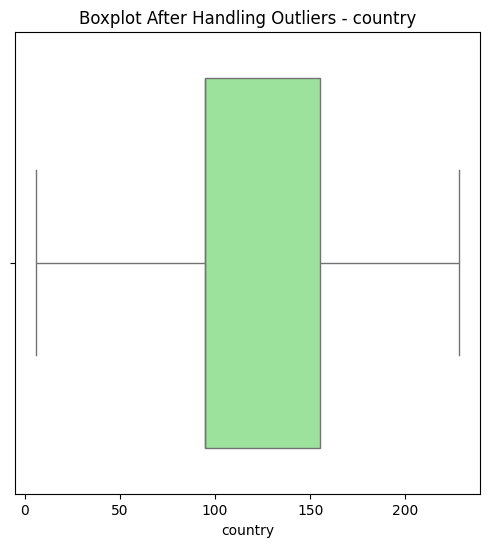

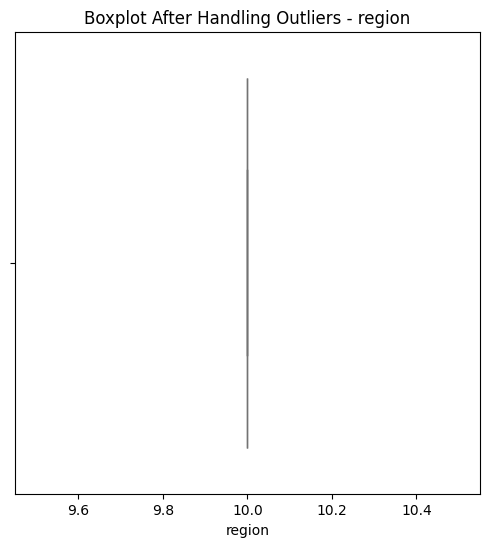

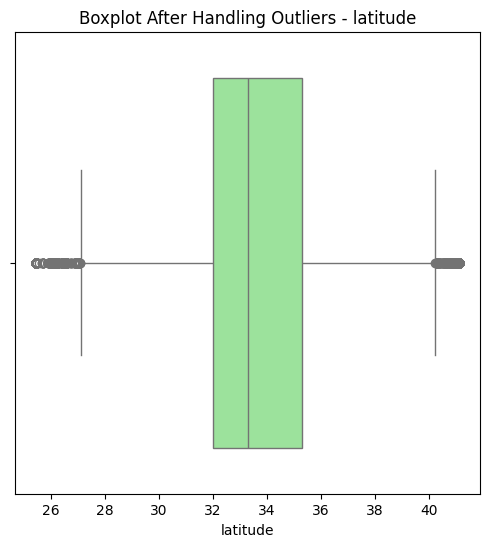

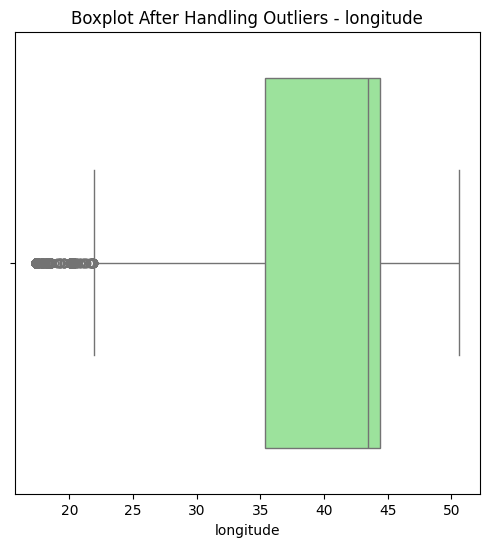

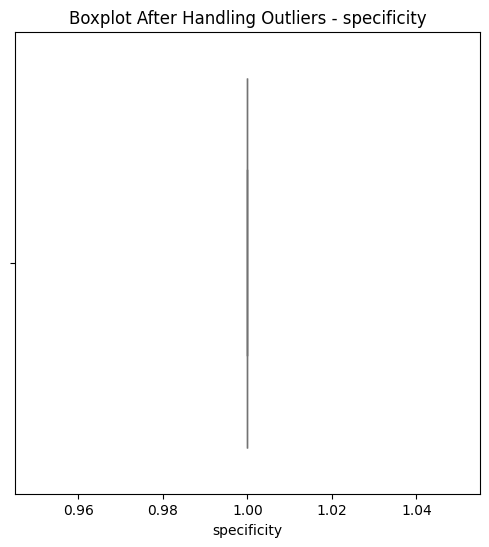

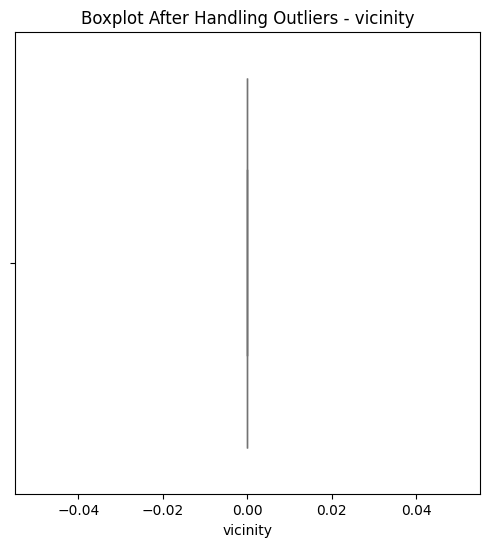

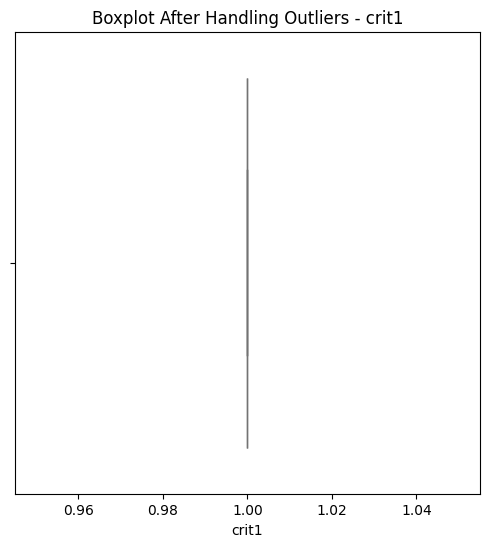

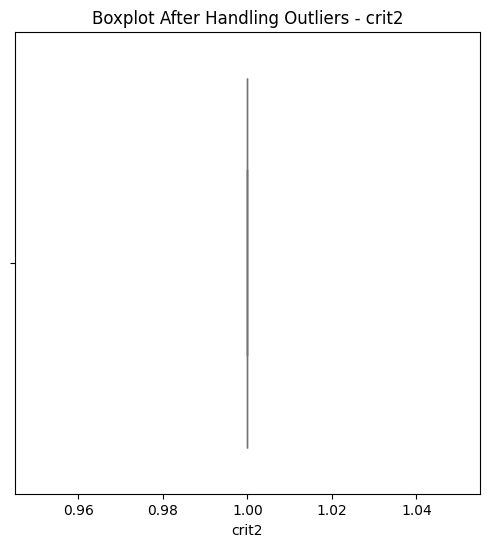

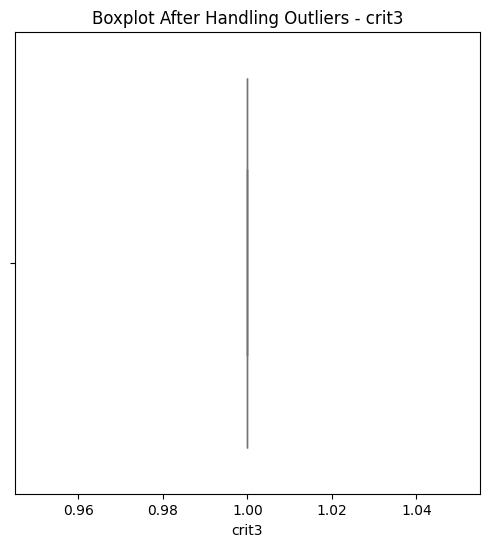

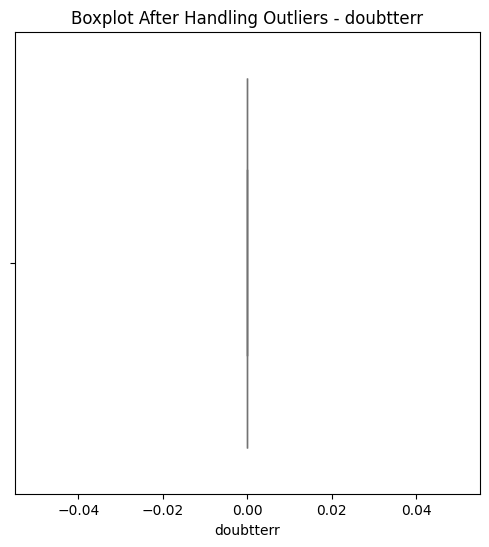

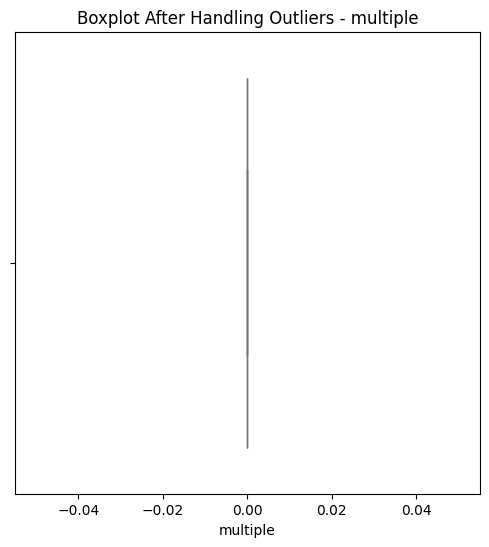

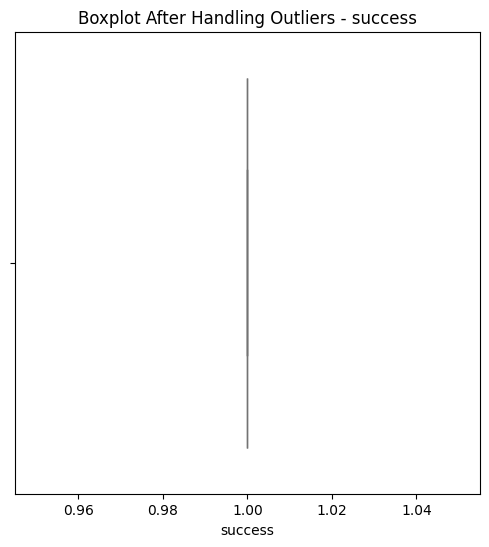

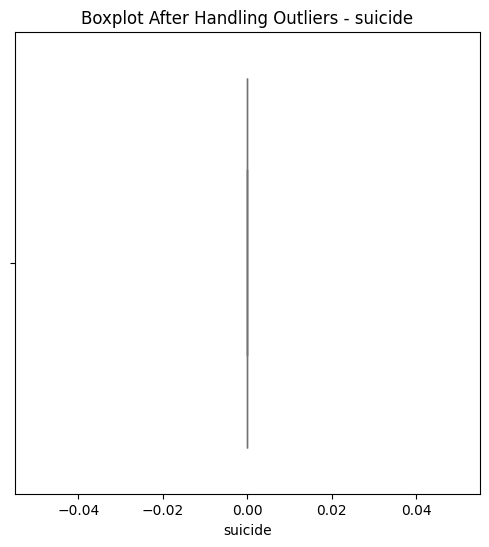

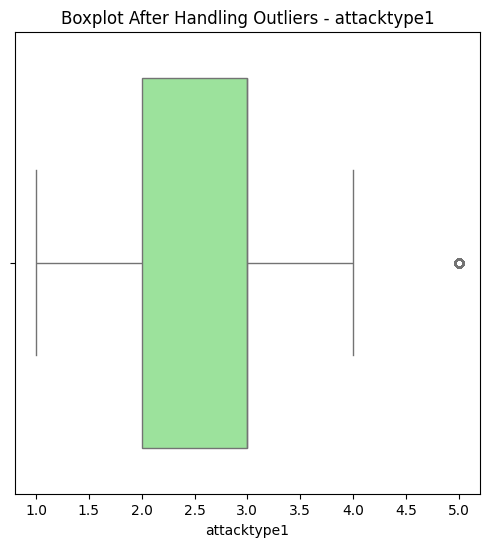

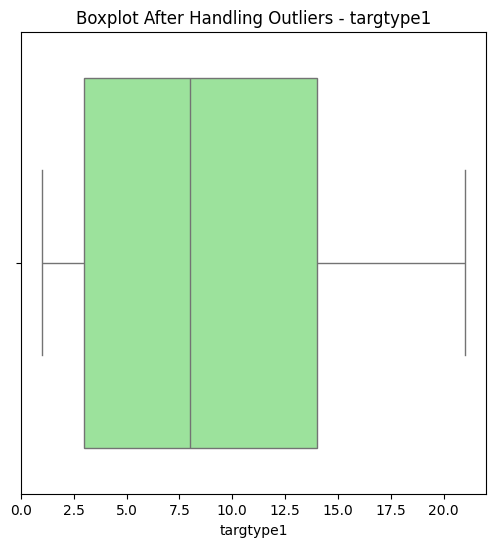

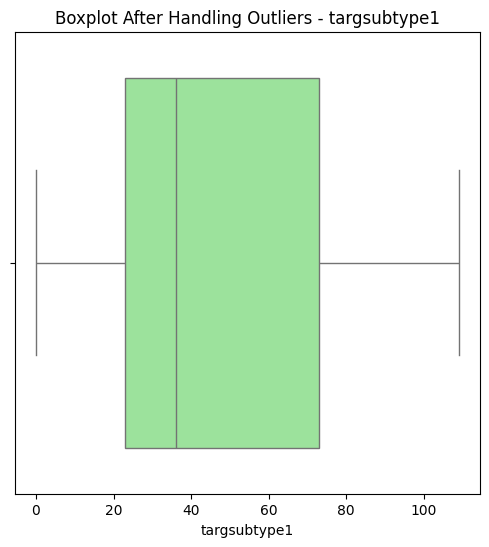

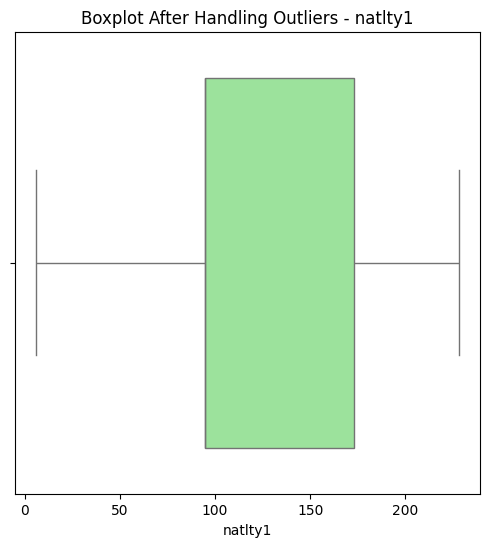

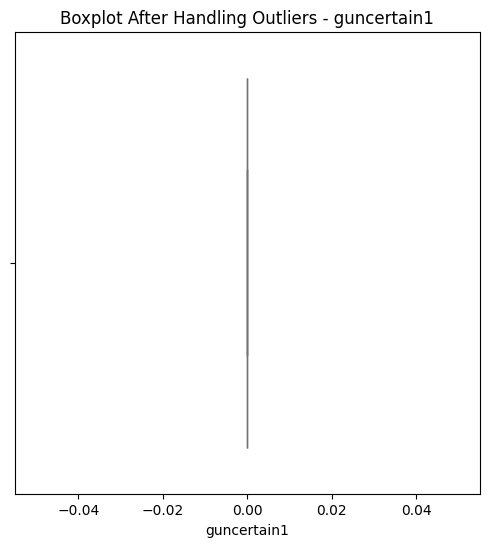

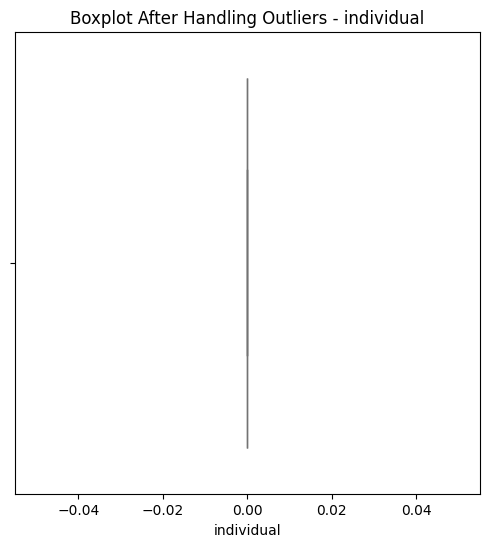

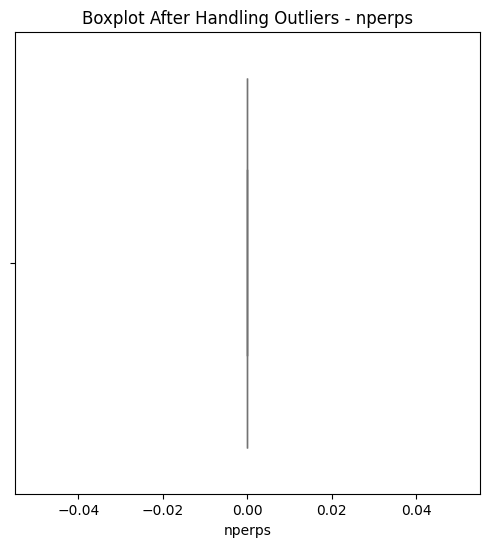

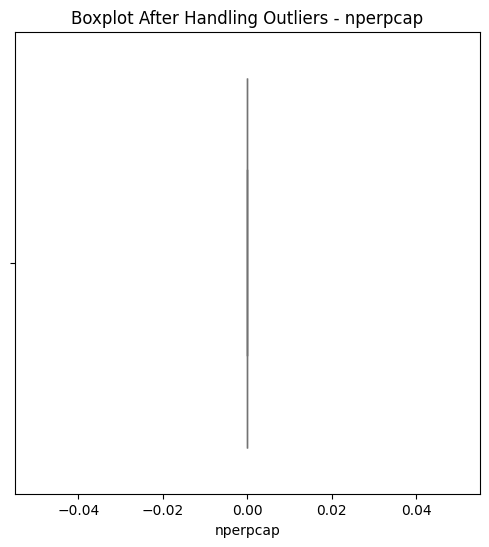

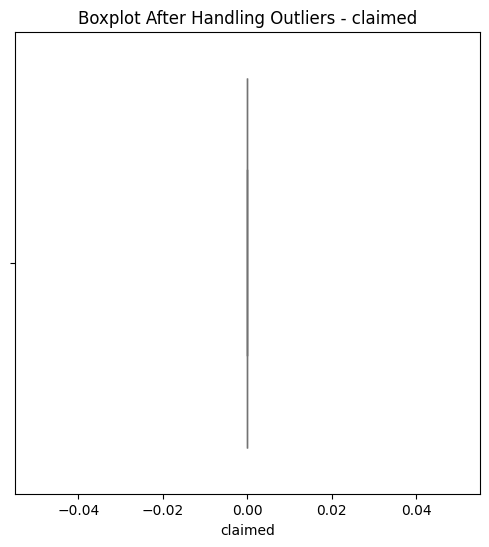

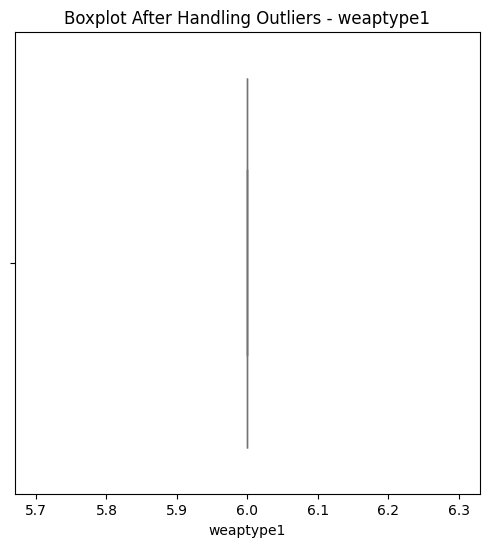

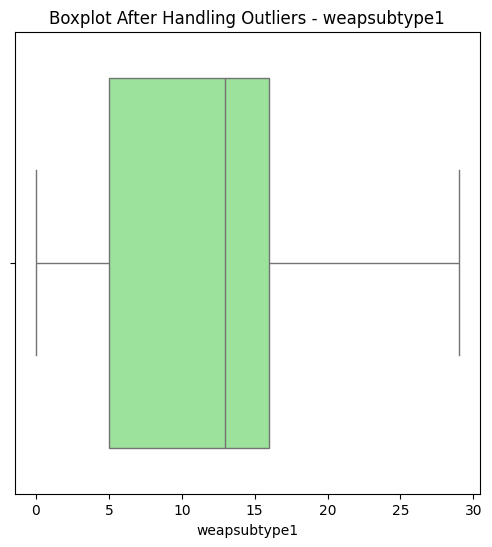

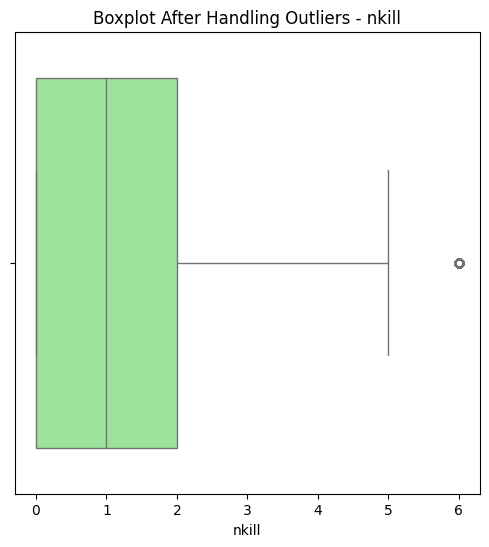

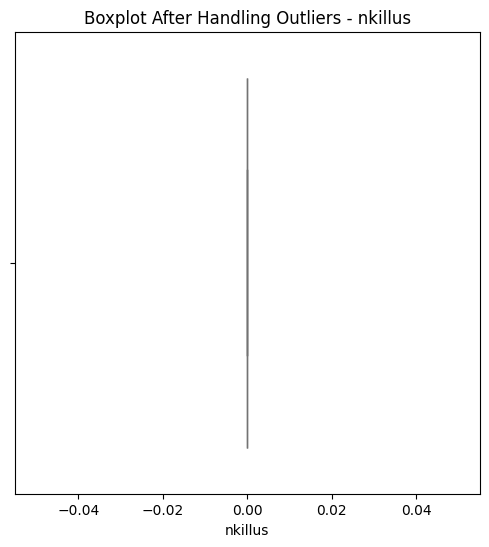

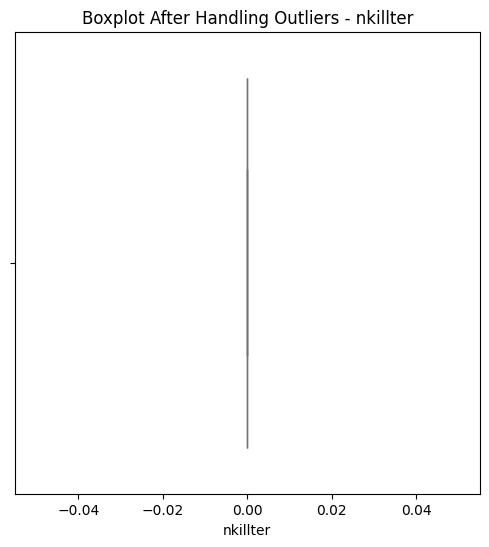

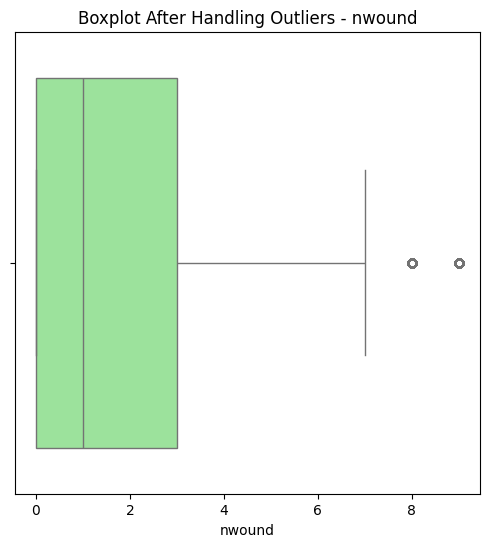

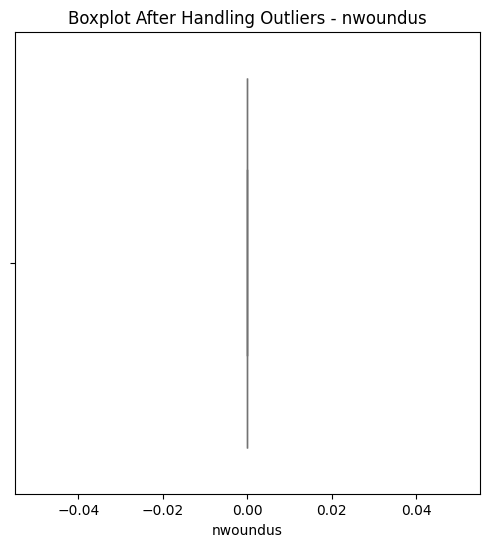

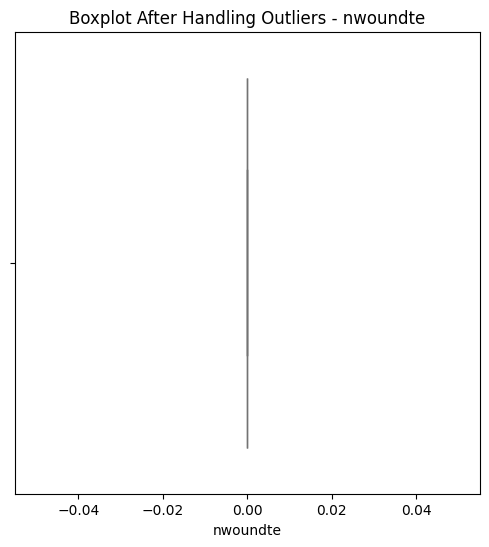

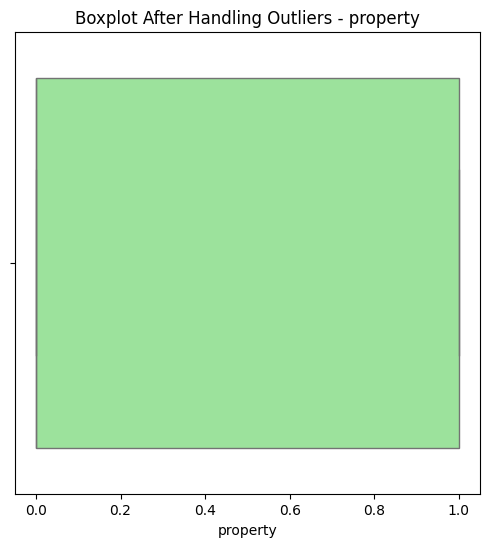

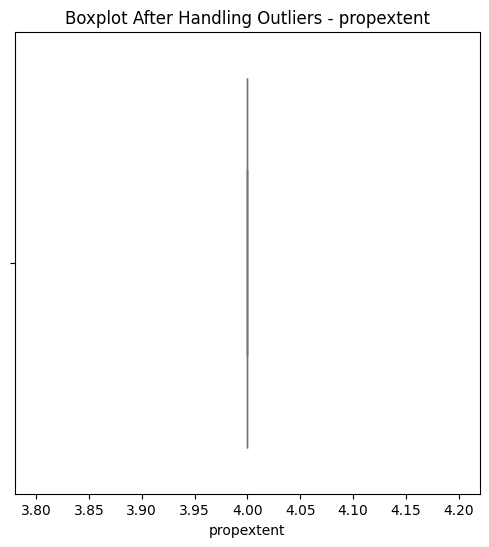

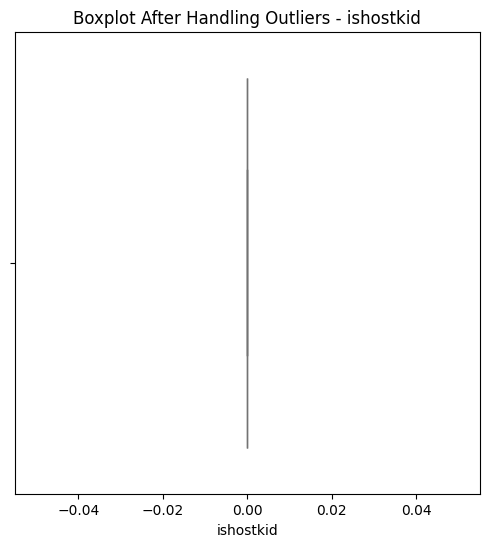

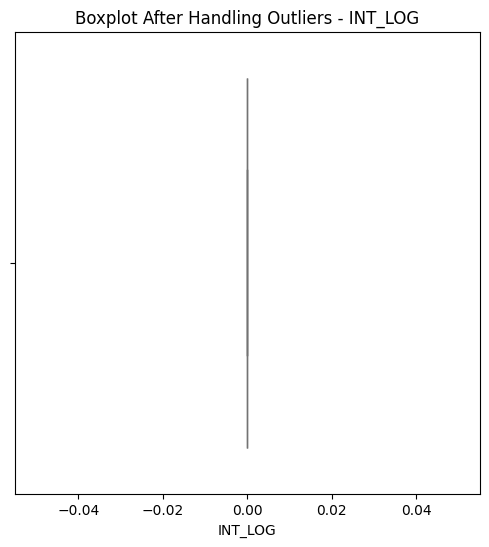

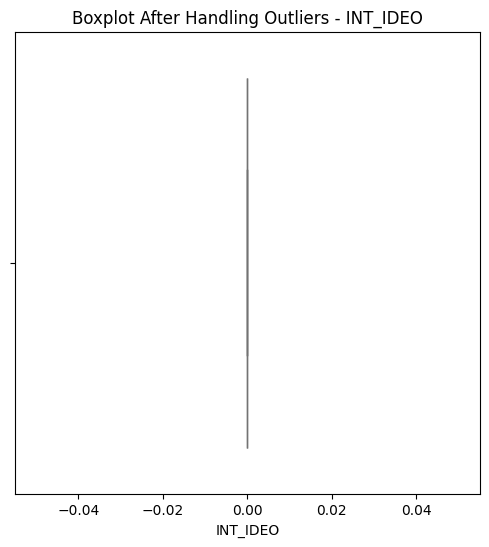

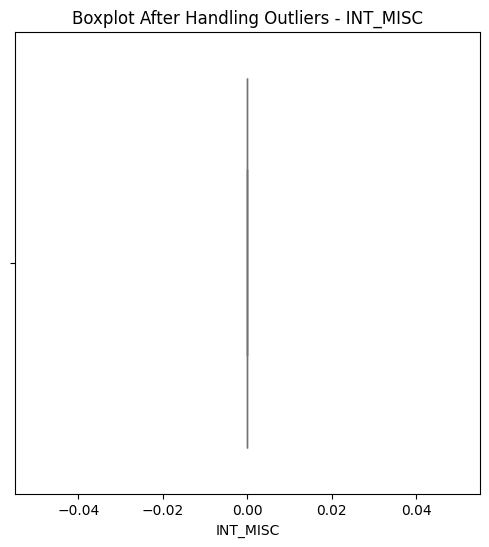

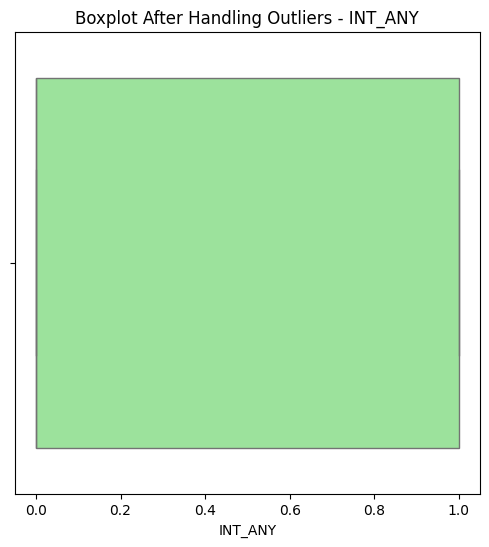

In [22]:
# Boxplot after removing or capping outliers
for column in df_capped.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(6, 6))
    sns.boxplot(data=df_capped, x=column, color="lightgreen")
    plt.title(f'Boxplot After Handling Outliers - {column}')
    plt.xlabel(column)
    plt.show()

Since here outliers are part of important data we will only do partial capping of outliers.

In [23]:
dff.shape

(58252, 63)

Since now our data is preprocessed we can go ahead with visualisations

#Visualizations

## History of Attacks in Middle East and North Africa Region

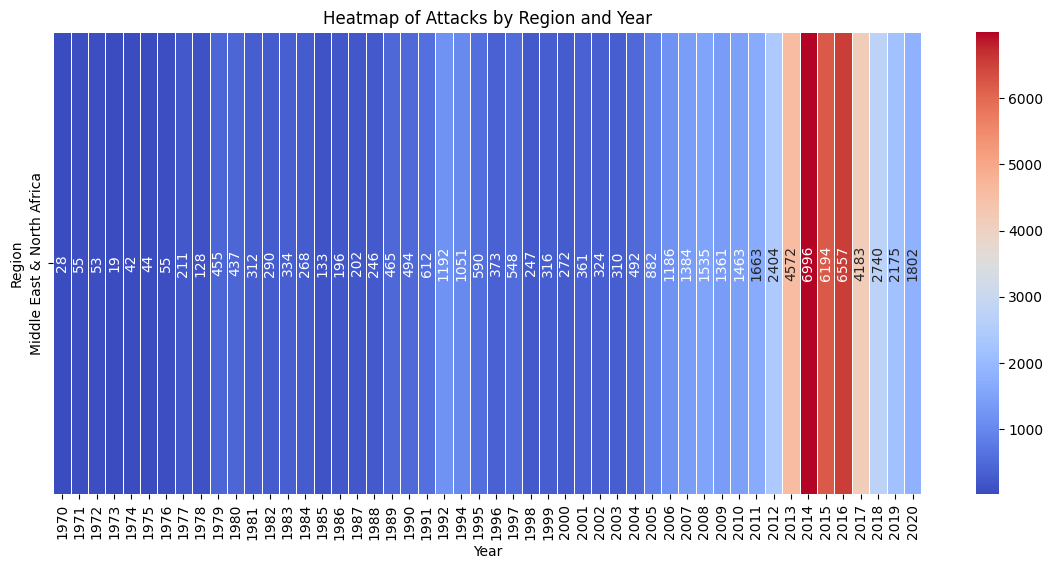

In [24]:
plt.figure(figsize=(14, 6))
region_year = dff.pivot_table(index='region_txt', columns='iyear', values='eventid', aggfunc='count')
sns.heatmap(region_year, cmap="coolwarm", linewidths=0.5, annot=True, fmt=".0f", annot_kws={"rotation": 90}) # Rotated annotations
plt.xlabel("Year")
plt.ylabel("Region")
plt.title("Heatmap of Attacks by Region and Year")
plt.show()


We can observe that attacks significantly increased from 2013 to 2017 where in the year of **2014** there were **maximum attacks.**

In [38]:
import plotly.express as px

# Define MENA region boundaries
lat_min, lat_max = -5, 40   # Covers North Africa & Middle East
lon_min, lon_max = -20, 65
dff_mena = dff[
    (dff['latitude'] >= lat_min) & (dff['latitude'] <= lat_max) &
    (dff['longitude'] >= lon_min) & (dff['longitude'] <= lon_max)
]
fig = px.density_mapbox(dff_mena,
                        lat='latitude',
                        lon='longitude',
                        z=None,
                        radius=12,
                        mapbox_style="carto-darkmatter",
                        center={"lat": 25, "lon": 35},
                        zoom=2.5)

# Stretch and increase figure size
fig.update_layout(
    title="Heatmap of Attacks in MENA Region",
    width=1400,
    height=700
)
fig.show()



## Trend of Incidents in Past Years

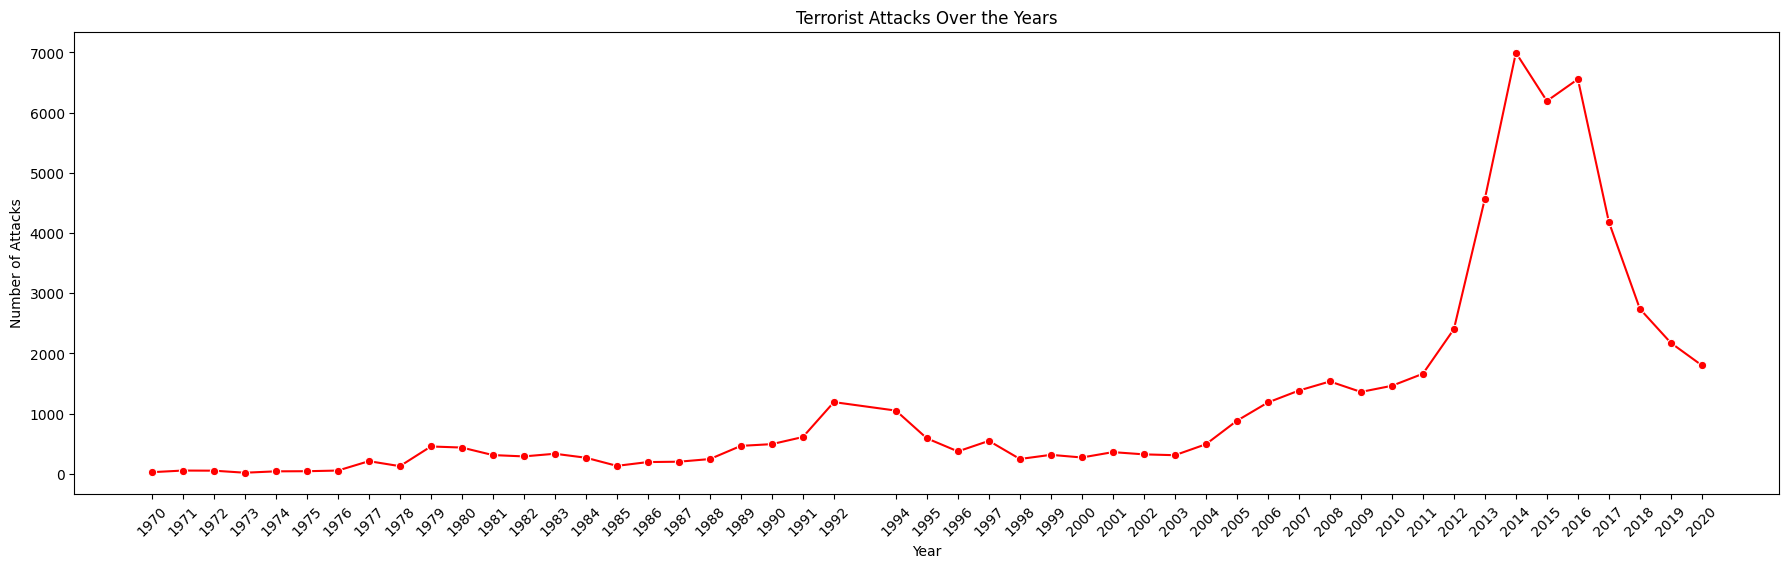

In [39]:
# Group data by year and count the number of attacks
attack_trend = dff.groupby('iyear')['eventid'].count().reset_index()

plt.figure(figsize=(22, 6))
sns.lineplot(data=attack_trend, x="iyear", y="eventid", marker="o", color="red")
plt.xticks(attack_trend['iyear'], rotation=45)

plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.title("Terrorist Attacks Over the Years")
plt.show()


Similar to the heatmap, here we can observe the trend of attacks from past years

## Top 10 Most Affected Countries

<ipython-input-46-7027c1d8d58d>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




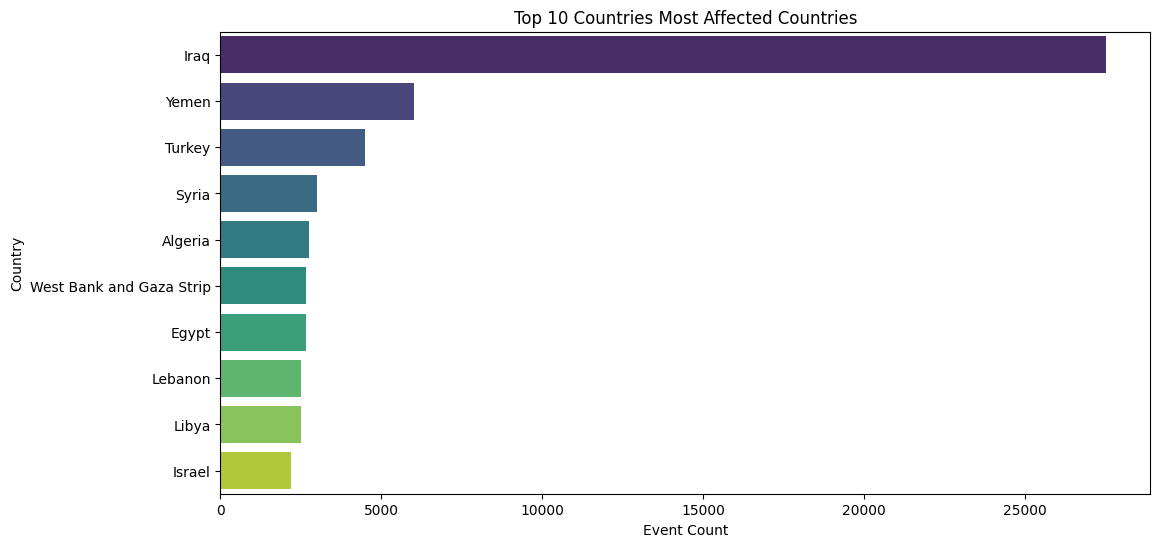

In [46]:
#Event Distribution by Country (Top 10)
plt.figure(figsize=(12, 6))
top_countries = dff['country_txt'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries Most Affected Countries")
plt.xlabel("Event Count")
plt.ylabel("Country")
plt.show()

## Types of Attack

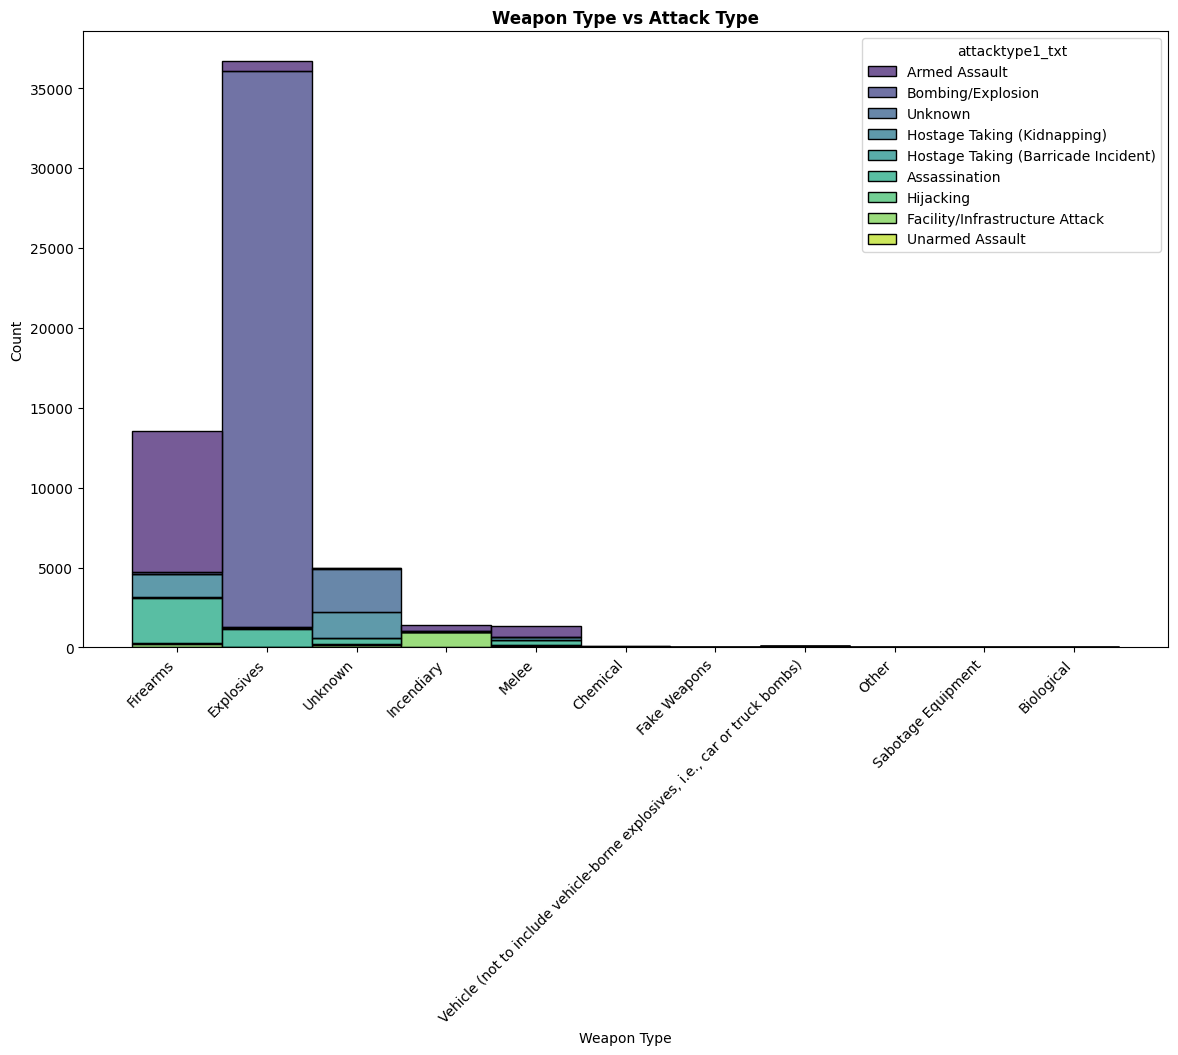

In [48]:
plt.figure(figsize=(14, 8))
sns.histplot(data=dff, x="weaptype1_txt", hue="attacktype1_txt", multiple="stack", palette="viridis", edgecolor="black")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Weapon Type")
plt.ylabel("Count")
plt.title("Weapon Type vs Attack Type",fontweight='bold')
plt.show()


We can infer that Explosives are the most commonly used type of weapon, primarily linked to bombing and explosion attacks.

In contrast, melee, incendiary, and other weapon types are used far less frequently, suggesting that the majority of attacks depend on high-impact weapons like explosives and firearms rather than close-contact or unconventional methods.

##Number of Casualties In Last Decade

<Figure size 1400x700 with 0 Axes>

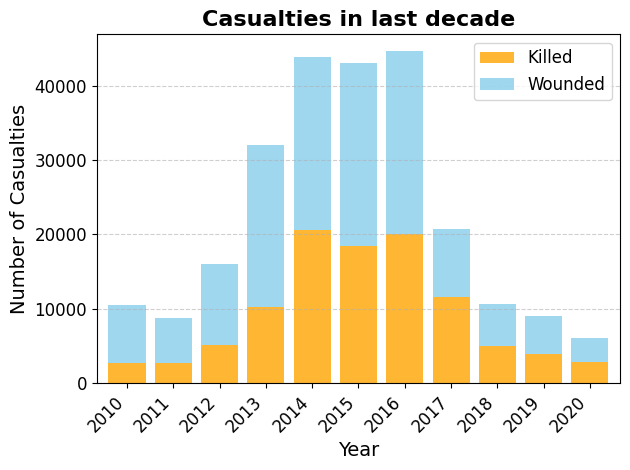

In [42]:
casualties_per_year = dff.groupby('iyear')[['nkill', 'nwound']].sum()
casualties_per_year_filtered = casualties_per_year[casualties_per_year.index >= 2010]

plt.figure(figsize=(14, 7))
ax = casualties_per_year_filtered.plot(kind='bar', stacked=True, color=['orange', 'skyblue'], alpha=0.8, width=0.8)

plt.title("Casualties in last decade", fontsize=16, fontweight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Number of Casualties", fontsize=14)
plt.yticks(fontsize=12)
plt.legend(["Killed", "Wounded"], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.xticks(ticks=range(len(casualties_per_year_filtered)), labels=casualties_per_year_filtered.index, rotation=45, ha='right', fontsize=12)

plt.tight_layout()
plt.show()


Casualties were at their **highest between 2014 and 2017**, with deaths and injuries hitting peak levels before starting to decline in the following years.
The count of injured individuals consistently surpasses the number of fatalities, showing that most attacks lead to more injuries than deaths.

## Top most Prone Targets

<ipython-input-45-a480a3540971>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




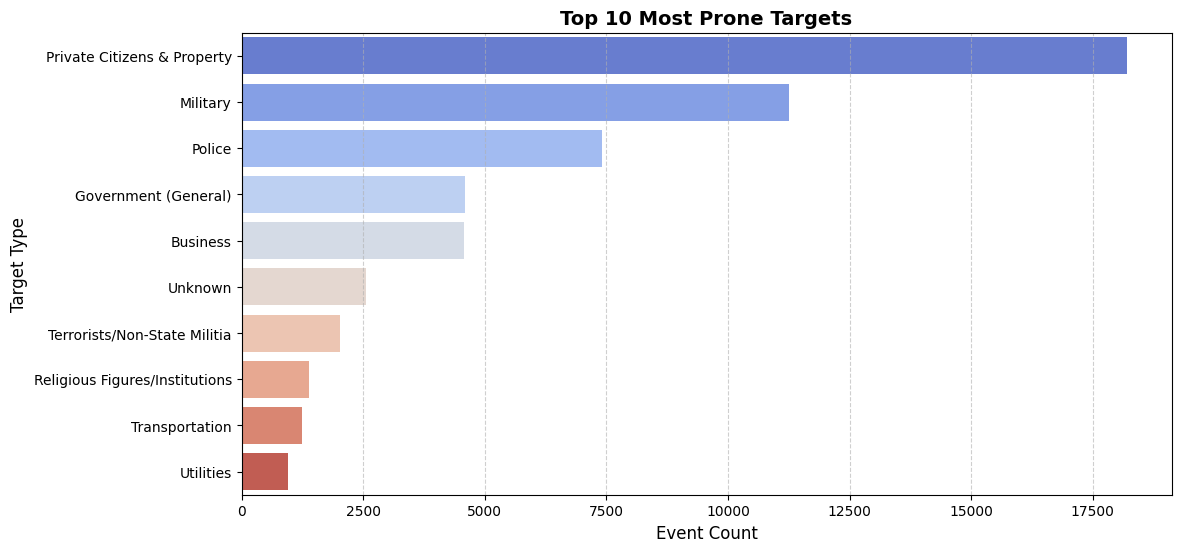

In [45]:
# Top most prone targets
top_10_targets = dff['targtype1_txt'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_targets.values, y=top_10_targets.index, palette='coolwarm')
plt.title("Top 10 Most Prone Targets", fontsize=14, fontweight='bold')
plt.xlabel("Event Count", fontsize=12)
plt.ylabel("Target Type", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

1. Most attacks are aimed at **civilian, military, and law enforcement targets**, highlighting an intent to undermine public safety and stability.

2. The data reveals a notable drop in event counts following the top three categories, with **government and business targets still experiencing considerable impacts**, while **transportation, utilities, and religious institutions encounter relatively fewer incidents**.

## Most Active Terrorist groups (w.r.t data)

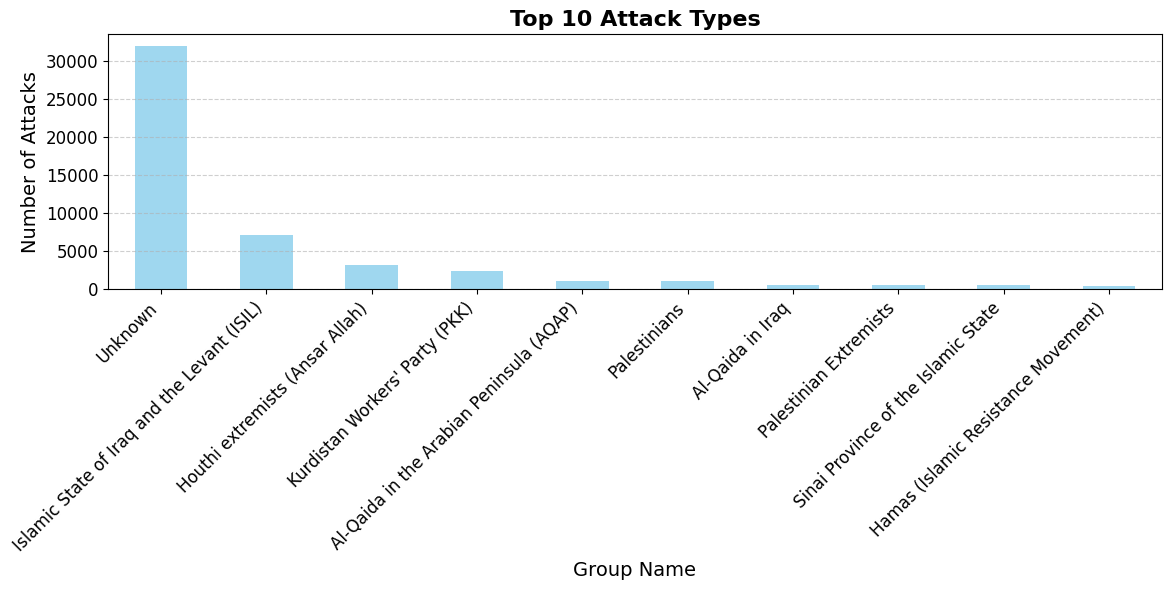

In [43]:
attack_type_counts = dff['gname'].value_counts()
top_10_attack_types = attack_type_counts.head(10)
plt.figure(figsize=(12, 6))
top_10_attack_types.plot(kind='bar', color='skyblue', alpha=0.8)

plt.title("Top 10 Attack Types", fontsize=16, fontweight='bold')
plt.xlabel("Group Name", fontsize=14)
plt.ylabel("Number of Attacks", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Among the recognized groups, **ISIL, Houthi extremists, and PKK** account for the majority of attacks, whereas other groups have a relatively lower number of incidents.